# Hoofdstuk 17 Multiple integrals

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib
import numpy as np
import random
matplotlib.rcParams["font.family"] = "monospace"
matplotlib.rcParams['font.style'] = "italic"
plt.rcParams.update({'mathtext.default':  'regular' })

In [2]:
def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)

## Iterated integrals and area

### fig_multiple_1a

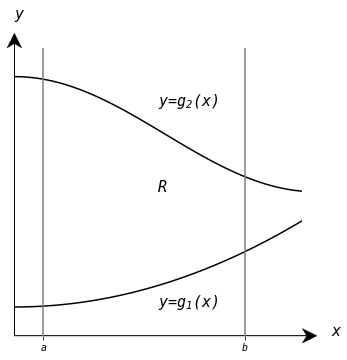

In [3]:
fig1a = plt.figure(figsize=(4,4))
ax1a = fig1a.add_axes([0,0,1,1])
ax1a.set_xlim(0, 1)
ax1a.set_ylim(0, 1)
ax1a.set_yticks([])
ax1a.set_xticks([0.1, 0.8])
labels_x = [item.get_text() for item in ax1a.get_xticklabels()]
labels_x[0] = 'a'
labels_x[1] = 'b'
ax1a.set_xticklabels(labels_x)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax1a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax1a.spines[direction].set_position('zero')

x = np.linspace(0, 1, 40)
ax1a.plot(x, .3*x**2+.1, color='black')
ax1a.plot(x, .2*np.cos(3*x)+.7, color='black')
ax1a.plot([0.1, 0.1], [0, 2], color='grey')
ax1a.plot([0.8, 0.8], [0, 2], color='grey')

ax1a.arrow(0, 0, 1, 0., fc='k', ec='k', lw = .5, head_width=0.05, head_length=0.05, overhang = 0.3, length_includes_head= False, clip_on = False)
ax1a.arrow(0, 0, 0, 1, fc='k', ec='k', lw = .5, head_width=0.05, head_length=0.05, overhang = 0.3, length_includes_head= False, clip_on = False)

ax1a.text(0.5, 0.5, 'R', color="black", size=15)
ax1a.text(0.5, 0.8, 'y=g$_2$(x)', color="black", size=15)
ax1a.text(0.5, 0.1, 'y=g$_1$(x)', color="black", size=15)

ax1a.text(1.1, 0, 'x', color="black", size=15)
ax1a.text(0, 1.1, 'y', color="black", size=15)
fig1a.savefig("fig_multiple_1a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_1b

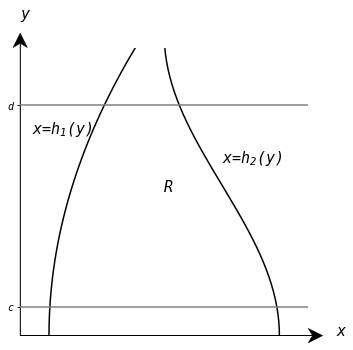

In [4]:
fig1b = plt.figure(figsize=(4,4))
ax1b = fig1b.add_axes([0,0,1,1])
ax1b.set_xlim(0, 1)
ax1b.set_ylim(0, 1)
ax1b.set_yticks([0.1, 0.8])
ax1b.set_xticks([])
labels_y = [item.get_text() for item in ax1b.get_yticklabels()]
labels_y[0] = 'c'
labels_y[1] = 'd'
ax1b.set_yticklabels(labels_y)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax1b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax1b.spines[direction].set_position('zero')

y = np.linspace(0, 1, 40)
ax1b.plot(.3*y**2+.1, y, color='black')
ax1b.plot(.2*np.cos(3*y)+.7, y, color='black')
ax1b.plot([0, 2], [0.1, 0.1], color='grey')
ax1b.plot([0, 2], [0.8, 0.8], color='grey')

ax1b.arrow(0, 0, 1, 0., fc='k', ec='k', lw = .5, head_width=0.05, head_length=0.05, overhang = 0.3, length_includes_head= False, clip_on = False)
ax1b.arrow(0, 0, 0, 1, fc='k', ec='k', lw = .5, head_width=0.05, head_length=0.05, overhang = 0.3, length_includes_head= False, clip_on = False)

ax1b.text(0.5, 0.5, 'R', color="black", size=15)
ax1b.text(0.7, 0.6, 'x=h$_2$(y)', color="black", size=15)
ax1b.text(0.04, 0.7, 'x=h$_1$(y)', color="black", size=15)

ax1b.text(1.1, 0, 'x', color="black", size=15)
ax1b.text(0, 1.1, 'y', color="black", size=15)
fig1b.savefig("fig_multiple_1b.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_2a

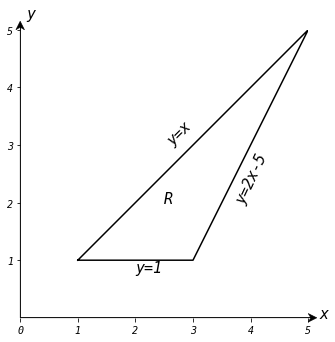

In [5]:
fig2a = plt.figure(figsize=(4,4))
ax2a = fig2a.add_axes([0,0,1,1])
ax2a.set_xlim(0, 5)
ax2a.set_ylim(0, 5)
ax2a.set_yticks([1, 2, 3, 4, 5])
ax2a.set_xticks([0, 1, 2, 3, 4, 5])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax2a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax2a.spines[direction].set_position('zero')
        
ax2a.plot([1, 3, 5, 1], [1, 1, 5, 1], color='black')

ax2a.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax2a.arrow(0, 0, 0, 5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax2a.text(2.5, 3, 'y=x', color="black", size=15, rotation=45)
ax2a.text(3.7, 2, 'y=2x-5', color="black", size=15, rotation=65)
ax2a.text(2, 0.8, 'y=1', color="black", size=15)
ax2a.text(2.5, 2, 'R', color="black", size=15)

ax2a.text(5.2, 0, 'x', color="black", size=15)
ax2a.text(0.1, 5.2, 'y', color="black", size=15)
fig2a.savefig("fig_multiple_2a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_2b

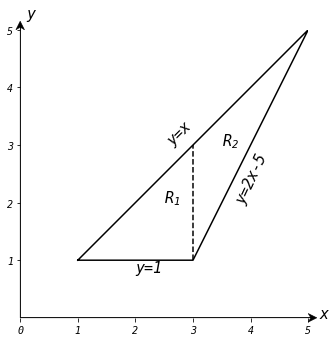

In [6]:
fig2b = plt.figure(figsize=(4,4))
ax2b = fig2b.add_axes([0,0,1,1])
ax2b.set_xlim(0, 5)
ax2b.set_ylim(0, 5)
ax2b.set_yticks([1, 2, 3, 4, 5])
ax2b.set_xticks([0, 1, 2, 3, 4, 5])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax2b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax2b.spines[direction].set_position('zero')
        
ax2b.plot([1, 3, 5, 1], [1, 1, 5, 1], color='black')
ax2b.plot([3, 3], [1, 3], color='black', ls='--')

ax2b.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax2b.arrow(0, 0, 0, 5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax2b.text(2.5, 3, 'y=x', color="black", size=15, rotation=45)
ax2b.text(3.7, 2, 'y=2x-5', color="black", size=15, rotation=65)
ax2b.text(2, 0.8, 'y=1', color="black", size=15)
ax2b.text(2.5, 2, 'R$_1$', color="black", size=15)
ax2b.text(3.5, 3, 'R$_2$', color="black", size=15)

ax2b.text(5.2, 0, 'x', color="black", size=15)
ax2b.text(0.1, 5.2, 'y', color="black", size=15)
fig2b.savefig("fig_multiple_2b.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_3

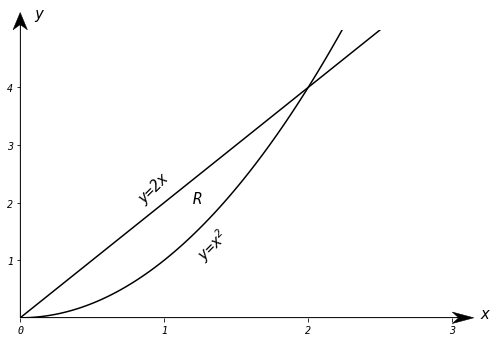

In [7]:
fig3 = plt.figure(figsize=(6,4))
ax3 = fig3.add_axes([0,0,1,1])
ax3.set_xlim(0, 3)
ax3.set_ylim(0, 5)
ax3.set_yticks([1, 2, 3, 4])
ax3.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax3.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax3.spines[direction].set_position('zero')

x = np.linspace(0, 3, 100)
ax3.plot(x, 2*x, color='black')
ax3.plot(x, x**2, color='black')

ax3.arrow(0, 0, 3, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax3.arrow(0, 0, 0, 5, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.3, overhang = 0.3, length_includes_head= False, clip_on = False)

ax3.text(1.2, 1, 'y=x$^2$', color="black", size=15, rotation=45)
ax3.text(0.8, 2, 'y=2x', color="black", size=15, rotation=45)
ax3.text(1.2, 2, 'R', color="black", size=15)

ax3.text(3.2, 0, 'x', color="black", size=15)
ax3.text(0.1, 5.2, 'y', color="black", size=15)
fig3.savefig("fig_multiple_3.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_4a

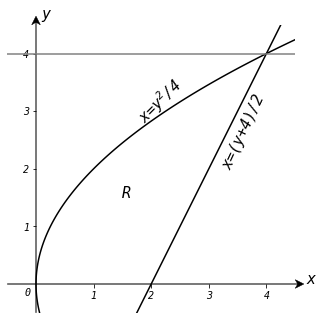

In [8]:
fig4a = plt.figure(figsize=(4,4))
ax4a = fig4a.add_axes([0,0,1,1])
ax4a.set_xlim(-0.5, 4.5)
ax4a.set_ylim(-0.5, 4.5)
ax4a.set_yticks([1, 2, 3, 4])
ax4a.set_xticks([1, 2, 3, 4])
ax4a.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax4a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax4a.spines[direction].set_position('zero')
        
y = np.linspace(-0.5, 4.5, 100)
ax4a.plot(y**2/4, y, color='black')
ax4a.plot((y+4)/2, y, color='black')
ax4a.plot([-0.5,4.5], [4,4], color='grey')

ax4a.arrow(-0.5, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax4a.arrow(0, -0.5, 0, 5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax4a.text(1.7, 2.8, 'x=y$^2$/4', color="black", size=15, rotation=45)
ax4a.text(3.2, 2, 'x=(y+4)/2', color="black", size=15, rotation=65)
ax4a.text(1.5, 1.5, 'R', color="black", size=15)

ax4a.text(4.7, 0, 'x', color="black", size=15)
ax4a.text(0.1, 4.6, 'y', color="black", size=15)
fig4a.savefig("fig_multiple_4a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_4b

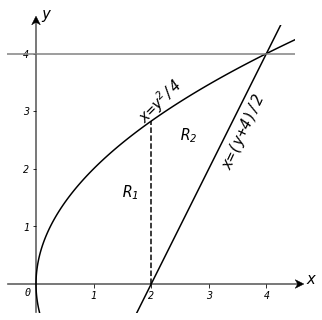

In [9]:
fig4b = plt.figure(figsize=(4,4))
ax4b = fig4b.add_axes([0,0,1,1])
ax4b.set_xlim(-0.5, 4.5)
ax4b.set_ylim(-0.5, 4.5)
ax4b.set_yticks([1, 2, 3, 4])
ax4b.set_xticks([1, 2, 3, 4])
ax4b.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax4b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax4b.spines[direction].set_position('zero')
        
y = np.linspace(-0.5, 4.5, 100)
ax4b.plot(y**2/4, y, color='black')
ax4b.plot((y+4)/2, y, color='black')
ax4b.plot([-0.5,4.5], [4,4], color='grey')
ax4b.plot([2, 2], [0, 2*np.sqrt(2)], color='black', ls='--')

ax4b.arrow(-0.5, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax4b.arrow(0, -0.5, 0, 5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax4b.text(1.7, 2.8, 'x=y$^2$/4', color="black", size=15, rotation=45)
ax4b.text(3.2, 2, 'x=(y+4)/2', color="black", size=15, rotation=65)
ax4b.text(1.5, 1.5, 'R$_1$', color="black", size=15)
ax4b.text(2.5, 2.5, 'R$_2$', color="black", size=15)

ax4b.text(4.7, 0, 'x', color="black", size=15)
ax4b.text(0.1, 4.6, 'y', color="black", size=15)
fig4b.savefig("fig_multiple_4b.pdf",bbox_inches='tight')
plt.show()

## Double integration and volume

### fig_multiple_5a

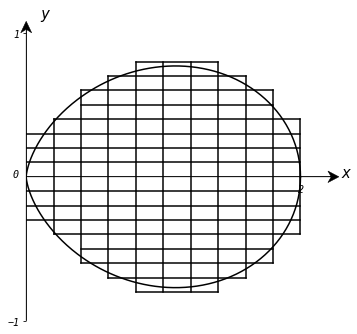

In [10]:
fig5a = plt.figure(figsize=(4,4))
ax5a = fig5a.add_axes([0,0,1,1])
ax5a.set_xlim(0, 2.1)
ax5a.set_ylim(-1, 1)
ax5a.set_yticks([-1, 1])
ax5a.set_xticks([2])
ax5a.text(-0.1, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax5a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax5a.spines[direction].set_position('zero')
        
t = np.linspace(0, 2*np.pi, 1000)
ax5a.plot(np.cos(t)*(1+np.cos(2*t)), np.sin(t)*(1+np.cos(2*t)), color='black')

ax5a.plot([.2, .2], [-.4, .4], color='black')
ax5a.plot([.4, .4], [-.6, .6], color='black')
ax5a.plot([.6, .6], [-.7, .7], color='black')
ax5a.plot([.8, .8], [-.8, .8], color='black')
ax5a.plot([1, 1], [-.8, .8], color='black')
ax5a.plot([1.2, 1.2], [-.8, .8], color='black')
ax5a.plot([1.4, 1.4], [-.8, .8], color='black')
ax5a.plot([1.6, 1.6], [-.7, .7], color='black')
ax5a.plot([1.8, 1.8], [-.6, .6], color='black')
ax5a.plot([2, 2], [-.4, .4], color='black')

ax5a.plot([.8, 1.4], [.8, .8], color='black')
ax5a.plot([.6, 1.6], [.7, .7], color='black')
ax5a.plot([.4, 1.8], [.6, .6], color='black')
ax5a.plot([.4, 1.8], [.5, .5], color='black')
ax5a.plot([.2, 2], [.4, .4], color='black')
ax5a.plot([0, 2], [.3, .3], color='black')
ax5a.plot([0, 2], [.2, .2], color='black')
ax5a.plot([0, 2], [.1, .1], color='black')
ax5a.plot([.8, 1.4], [-.8, -.8], color='black')
ax5a.plot([.6, 1.6], [-.7, -.7], color='black')
ax5a.plot([.4, 1.8], [-.6, -.6], color='black')
ax5a.plot([.4, 1.8], [-.5, -.5], color='black')
ax5a.plot([.2, 2], [-.4, -.4], color='black')
ax5a.plot([0, 2], [-.3, -.3], color='black')
ax5a.plot([0, 2], [-.2, -.2], color='black')
ax5a.plot([0, 2], [-.1, -.1], color='black')

ax5a.arrow(0, 0, 2.2, 0., fc='k', ec='k', lw = .5, head_width=0.08, head_length=0.08, overhang = 0.3, length_includes_head= False, clip_on = False)
ax5a.arrow(0, -1, 0, 2, fc='k', ec='k', lw = .5, head_width=0.08, head_length=0.08, overhang = 0.3, length_includes_head= False, clip_on = False)

ax5a.text(2.3, 0, 'x', color="black", size=15)
ax5a.text(0.1, 1.1, 'y', color="black", size=15)
fig5a.savefig("fig_multiple_5a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_5b

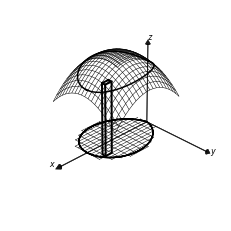

In [11]:
# figure set-up
fig5b = plt.figure(figsize=(4,4))
ax5b = plt.axes(projection='3d')
ax5b.axis('off')
ax5b.margins(0,0,0)


x, y = np.meshgrid(np.linspace(0, 2.1, 20), np.linspace(-1, 1, 20))
z = -.5*(x-1)**2-.5*(y)**2+2

ax5b.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 1000)
ax5b.plot3D(np.abs(np.cos(t)*(1+np.cos(2*t))), np.sin(t)*(1+np.cos(2*t)), t*0, color='black')
x = np.cos(t)*(1+np.cos(2*t))
y = np.sin(t)*(1+np.cos(2*t))
z = -0.5*((np.cos(t)*(1+np.cos(2*t)))-1)**2 - 0.5*(np.sin(t)*(1+np.cos(2*t)))**2+2
x_list = []
y_list = []
z_list = []
for i, value in enumerate(x):
    if value >= 0:
        x_list.append(x[i])
        y_list.append(y[i])
        z_list.append(z[i])
ax5b.plot3D(x_list, y_list, z_list, color='black')

ax5b.plot3D([.2, .2], [-.4, .4], [0,0], color='black', lw=0.5)
ax5b.plot3D([.4, .4], [-.6, .6], [0,0], color='black', lw=0.5)
ax5b.plot3D([.6, .6], [-.7, .7], [0,0], color='black', lw=0.5)
ax5b.plot3D([.8, .8], [-.8, .8], [0,0], color='black', lw=0.5)
ax5b.plot3D([1, 1], [-.8, .8], [0,0], color='black', lw=0.5)
ax5b.plot3D([1.2, 1.2], [-.8, .8], [0,0], color='black', lw=0.5)
ax5b.plot3D([1.4, 1.4], [-.8, .8], [0,0], color='black', lw=0.5)
ax5b.plot3D([1.6, 1.6], [-.7, .7], [0,0], color='black', lw=0.5)
ax5b.plot3D([1.8, 1.8], [-.6, .6], [0,0], color='black', lw=0.5)
ax5b.plot3D([2, 2], [-.4, .4], [0,0], color='black', lw=0.5)

ax5b.plot3D([.8, 1.4], [.8, .8], [0,0], color='black', lw=0.5)
ax5b.plot3D([.6, 1.6], [.7, .7], [0,0], color='black', lw=0.5)
ax5b.plot3D([.4, 1.8], [.6, .6], [0,0], color='black', lw=0.5)
ax5b.plot3D([.4, 1.8], [.5, .5], [0,0], color='black', lw=0.5)
ax5b.plot3D([.2, 2], [.4, .4], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [.3, .3], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [.2, .2], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [.1, .1], [0,0], color='black', lw=0.5)
ax5b.plot3D([.8, 1.4], [-.8, -.8], [0,0], color='black', lw=0.5)
ax5b.plot3D([.6, 1.6], [-.7, -.7], [0,0], color='black', lw=0.5)
ax5b.plot3D([.4, 1.8], [-.6, -.6], [0,0], color='black', lw=0.5)
ax5b.plot3D([.4, 1.8], [-.5, -.5], [0,0], color='black', lw=0.5)
ax5b.plot3D([.2, 2], [-.4, -.4], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [-.3, -.3], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [-.2, -.2], [0,0], color='black', lw=0.5)
ax5b.plot3D([0, 2], [-.1, -.1], [0,0], color='black', lw=0.5)

ax5b.plot3D([1.6, 1.6, 1.8, 1.8, 1.6], [0.3, .4, .4, 0.3, 0.3], [1.69, 1.69, 1.69, 1.69, 1.69], color='black', lw=2)
ax5b.plot3D([1.8, 1.8, 1.8, 1.6, 1.6], [0.3, .3, .4, 0.4, 0.4], [1.69, 0, 0, 0, 1.69], color='black', lw=2)
ax5b.plot3D([1.8, 1.8], [.4, .4], [0, 1.69], color='black', lw=2)

# Axis
arrow3d(ax5b, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax5b, length=2, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax5b, length=2, width=0.01, head=0.05, headwidth=6, color='black')

ax5b.text(3, -0.2, 0, "x", style='italic', color='black', size=8)
ax5b.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax5b.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax5b.view_init(30, 45)
fig5b.savefig("fig_multiple_5b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_6

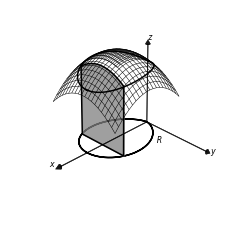

In [12]:
# figure set-up
fig6 = plt.figure(figsize=(4,4))
ax6 = plt.axes(projection='3d')
ax6.axis('off')
ax6.margins(0,0,0)


x, y = np.meshgrid(np.linspace(0, 2.1, 20), np.linspace(-1, 1, 20))
z = -.5*(x-1)**2-.5*(y)**2+2

ax6.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 1000)
ax6.plot3D(np.abs(np.cos(t)*(1+np.cos(2*t))), np.sin(t)*(1+np.cos(2*t)), t*0, color='black')
x = np.cos(t)*(1+np.cos(2*t))
y = np.sin(t)*(1+np.cos(2*t))
z = -0.5*((np.cos(t)*(1+np.cos(2*t)))-1)**2 - 0.5*(np.sin(t)*(1+np.cos(2*t)))**2+2
x_list = []
y_list = []
z_list = []
for i, value in enumerate(x):
    if value >= 0:
        x_list.append(x[i])
        y_list.append(y[i])
        z_list.append(z[i])
ax6.plot3D(x_list, y_list, z_list, color='black', zorder=8)

x = np.linspace(1.5, 1.5, 100)
y = np.linspace(-0.68, 0.68, 100)
z = -0.5*((x)-1)**2 - 0.5*(y)**2+2
ax6.plot(x, y, z, color='black', zorder=8)
ax6.plot([1.5, 1.5, 1.5, 1.5], [-0.68, -0.68, 0.68, 0.68], [z[0], 0, 0, z[-1]], color='black', zorder=8)

ax6.add_collection3d(plt.fill_between(y,z,0, color='grey', alpha=0.5), zs=1.5, zdir='x')

ax6.text(0.5, 0.8, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax6, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax6, length=2, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax6, length=2, width=0.01, head=0.05, headwidth=6, color='black')

ax6.text(3, -0.2, 0, "x", style='italic', color='black', size=8)
ax6.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax6.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax6.view_init(30, 45)
fig6.savefig("fig_multiple_6.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_7

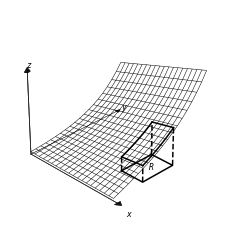

In [13]:
# figure set-up
fig7 = plt.figure(figsize=(4,4))
ax7 = plt.axes(projection='3d')
ax7.axis('off')
ax7.margins(0,0,0)


x, y = np.meshgrid(np.linspace(0, 4.1, 20), np.linspace(0, 3, 20))
z = x*y+np.exp(y)

ax7.plot_wireframe(x, y, z, color='black', lw=0.5)

ax7.plot([3, 3, 4, 4, 3], [1, 2, 2, 1, 1], [0, 0, 0, 0, 0], color='black', zorder=8)

x = np.linspace(3, 4, 10)
y = np.linspace(1, 1, 10)
ax7.plot(x, y, x*y+np.exp(y), color='black', zorder=8)
x = np.linspace(3, 4, 10)
y = np.linspace(2, 2, 10)
ax7.plot(x, y, x*y+np.exp(y), color='black', zorder=8)
x = np.linspace(3, 3, 10)
y = np.linspace(1, 2, 10)
ax7.plot(x, y, x*y+np.exp(y), color='black', zorder=8)
x = np.linspace(4, 4, 10)
y = np.linspace(1, 2, 10)
ax7.plot(x, y, x*y+np.exp(y), color='black', zorder=8)

ax7.plot([3, 3], [1, 1], [0, 3*1+np.exp(1)], color='black', ls='--', zorder=8)
ax7.plot([3, 3], [2, 2], [0, 3*2+np.exp(2)], color='black', ls='--', zorder=8)
ax7.plot([4, 4], [2, 2], [0, 4*2+np.exp(2)], color='black', ls='--', zorder=8)
ax7.plot([4, 4], [1, 1], [0, 4*1+np.exp(1)], color='black', ls='--', zorder=8)


ax7.text(3.6, 1.5, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax7, length=4.5, width=0.01, head=0.05, headwidth=10, theta_x=90, theta_z=90, color='black')
arrow3d(ax7, length=3, width=0.01, head=0.05, headwidth=10, theta_x=-90, color='black')
arrow3d(ax7, length=35, width=0.01, head=0.05, headwidth=8, color='black')

ax7.text(5, -0.2, 0, "x", style='italic', color='black', size=8)
ax7.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax7.text(0, 0, 35, "z", style='italic', color='black', size=8)

ax7.view_init(30, -45)
fig7.savefig("fig_multiple_7.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_8

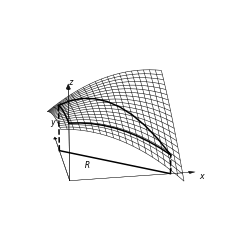

In [14]:
# figure set-up
fig8 = plt.figure(figsize=(4,4))
ax8 = plt.axes(projection='3d')
ax8.axis('off')
ax8.margins(0,0,0)


x, y = np.meshgrid(np.linspace(-0.2, 2.2, 20), np.linspace(-0.2, 1.2, 20))
z = 3*x*y-x**2-y**2+6

ax8.plot_wireframe(x, y, z, color='black', lw=0.5)

ax8.plot([0, 2], [1, 0], [0, 0], color='black', zorder=15)

x = np.linspace(0, 2, 10)
y = np.linspace(1, 0, 10)
ax8.plot(x, y, 3*x*y-x**2-y**2+6, color='black', zorder=15)
x = np.linspace(0, 0, 10)
y = np.linspace(0, 1, 10)
ax8.plot(x, y, 3*x*y-x**2-y**2+6, color='black', zorder=15)
x = np.linspace(0, 2, 10)
y = np.linspace(0, 0, 10)
ax8.plot(x, y, 3*x*y-x**2-y**2+6, color='black', zorder=15)

ax8.plot([0, 0], [1, 1], [0, 3*0*1-0**2-1**2+6], color='black', ls='--', zorder=15)
ax8.plot([2, 2], [0, 0], [0, 3*2*0-2**2-0**2+6], color='black', ls='--', zorder=15)

ax8.text(0.4, 0.4, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax8, length=2.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax8, length=1.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax8, length=10, width=0.005, head=0.05, headwidth=8, color='black')

ax8.text(2.5, -0.2, 0, "x", style='italic', color='black', size=8)
ax8.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax8.text(0, 0, 10, "z", style='italic', color='black', size=8)

ax8.view_init(20, -100)
fig8.savefig("fig_multiple_8.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_9

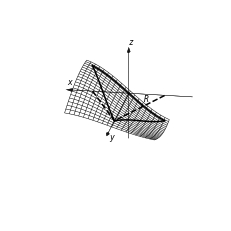

In [15]:
# figure set-up
fig9 = plt.figure(figsize=(4,4))
ax9 = plt.axes(projection='3d')
ax9.axis('off')
ax9.margins(0,0,0)


x, y = np.meshgrid(np.linspace(-1.1, 1.2, 20), np.linspace(-0.1, 1.2, 20))
z = np.sin(x)*np.cos(y)

ax9.plot_wireframe(x, y, z, color='black', lw=0.5)

x = np.linspace(-1, 1, 10)
y = np.linspace(0, 0, 10)
ax9.plot(x, y, np.sin(x)*np.cos(y), color='black', zorder=15)
x = np.linspace(1, 0, 10)
y = np.linspace(0, 1, 10)
ax9.plot(x, y, np.sin(x)*np.cos(y), color='black', zorder=15)
x = np.linspace(-1, 0, 10)
y = np.linspace(0, 1, 10)
ax9.plot(x, y, np.sin(x)*np.cos(y), color='black', zorder=15)

ax9.plot([1, 0, -1], [0, 1, 0], [0, 0, 0], color='black', ls='--', zorder=15)

ax9.text(-0.5, 0.25, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax9, length=3.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black', offset=(-1.75,0,0))
arrow3d(ax9, length=1.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax9, length=3, width=0.005, head=0.05, headwidth=8, color='black', offset=(0,0,-1.5))

ax9.text(1.8, -0.2, 0, "x", style='italic', color='black', size=8)
ax9.text(-0.1, 1.6, 0, "y", style='italic', color='black', size=8)
ax9.text(0, 0, 1.6, "z", style='italic', color='black', size=8)

ax9.view_init(20, 100)
fig9.savefig("fig_multiple_9.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_10a

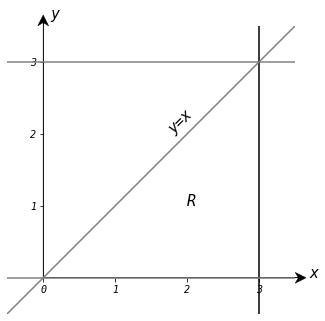

In [16]:
fig10a = plt.figure(figsize=(4,4))
ax10a = fig10a.add_axes([0,0,1,1])
ax10a.set_xlim(-0.5, 3.5)
ax10a.set_ylim(-0.5, 3.5)
ax10a.set_yticks([1, 2, 3])
ax10a.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax10a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax10a.spines[direction].set_position('zero')
        
ax10a.plot([-0.5, 3.5], [3, 3], color='grey')
ax10a.plot([3, 3], [-0.5, 3.5], color='black')
ax10a.plot([-0.5, 3.5], [0, 0], color='grey')
ax10a.plot([-0.5, 3.5], [-0.5, 3.5], color='grey')

ax10a.arrow(0, 0, 3.5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax10a.arrow(0, 0, 0, 3.5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax10a.text(1.7, 2, 'y=x', color="black", size=15, rotation=45)
ax10a.text(2, 1, 'R', color="black", size=15)

ax10a.text(3.7, 0, 'x', color="black", size=15)
ax10a.text(0.1, 3.6, 'y', color="black", size=15)
fig10a.savefig("fig_multiple_10a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_10b

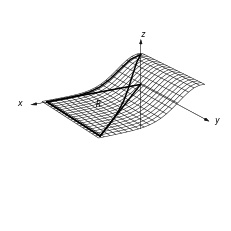

In [17]:
# figure set-up
fig10b = plt.figure(figsize=(4,4))
ax10b = plt.axes(projection='3d')
ax10b.axis('off')
ax10b.margins(0,0,0)


x, y = np.meshgrid(np.linspace(-0.1, 3.1, 20), np.linspace(-0.1, 3.1, 20))
z = np.exp(-x**2)

ax10b.plot_wireframe(x, y, z, color='black', lw=0.5)

x = np.linspace(0, 3, 10)
y = np.linspace(0, 3, 10)
ax10b.plot(x, y, np.exp(-x**2), color='black', zorder=15)
x = np.linspace(0, 3, 10)
y = np.linspace(0, 0, 10)
ax10b.plot(x, y, np.exp(-x**2), color='black', zorder=15)
x = np.linspace(3, 3, 10)
y = np.linspace(0, 3, 10)
ax10b.plot(x, y, np.exp(-x**2), color='black', zorder=15)

ax10b.plot([0, 3], [0, 3], [0, 0], color='black', zorder=15)
ax10b.plot([3, 3], [0, 3], [0, 0], color='black', zorder=15)
ax10b.plot([0, 3], [0, 0], [0, 0], color='black', zorder=15)

ax10b.text(2, 1, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax10b, length=3.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax10b, length=3.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax10b, length=3, width=0.005, head=0.05, headwidth=8, color='black', offset=(0,0,-1.5))

ax10b.text(3.8, -0.2, 0, "x", style='italic', color='black', size=8)
ax10b.text(-0.1, 3.6, 0, "y", style='italic', color='black', size=8)
ax10b.text(0, 0, 1.6, "z", style='italic', color='black', size=8)

ax10b.view_init(20, 60)
fig10b.savefig("fig_multiple_10b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_11

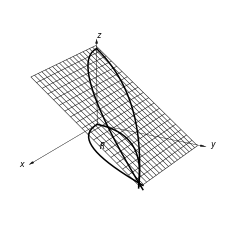

In [18]:
# figure set-up
fig11 = plt.figure(figsize=(4,4))
ax11 = plt.axes(projection='3d')
ax11.axis('off')
ax11.margins(0,0,0)


x, y = np.meshgrid(np.linspace(-0.1, 4.1, 20), np.linspace(-0.1, 4.1, 20))
z = 4-y

ax11.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 4.1, 20)
x = t
y = t**2/4
ax11.plot(x, y, 4-y, color='black', zorder=15)
x = t**2/4
y = t
ax11.plot(x, y, 4-y, color='black', zorder=15)

ax11.plot(t, t**2/4, t*0, color='black', zorder=15)
ax11.plot(t**2/4, t, t*0, color='black', zorder=15)

ax11.text(2, 1.3, 0, "R", style='italic', color='black', size=8)

# Axis
arrow3d(ax11, length=4.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax11, length=4.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax11, length=4.5, width=0.005, head=0.05, headwidth=8, color='black')

ax11.text(4.8, -0.2, 0, "x", style='italic', color='black', size=8)
ax11.text(-0.1, 4.6, 0, "y", style='italic', color='black', size=8)
ax11.text(0, 0, 4.6, "z", style='italic', color='black', size=8)

ax11.view_init(20, 30)
fig11.savefig("fig_multiple_11.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_12a

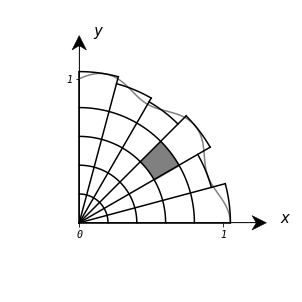

In [19]:
fig12a = plt.figure(figsize=(4,4))
ax12a = fig12a.add_axes([0,0,1,1])
ax12a.set_xlim(-0.5, 1.5)
ax12a.set_ylim(-0.5, 1.5)
ax12a.set_yticks([1])
ax12a.set_xticks([0, 1])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax12a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax12a.spines[direction].set_position('zero')

t = np.linspace(0, np.pi/2, 100)
ax12a.plot(np.cos(t)*(1+.05*np.cos(9*t)), np.sin(t)*(1+.05*np.cos(9*t)), color='grey')

t = np.linspace(0, 15/180*np.pi, 100)
ax12a.plot(1.05*np.cos(t), 1.05*np.sin(t), color='black')

t = np.linspace(15/180*np.pi, 30/180*np.pi, 100)
ax12a.plot(.95*np.cos(t), .95*np.sin(t), color='black')

t = np.linspace(30/180*np.pi, 45/180*np.pi, 100)
ax12a.plot(1.05*np.cos(t), 1.05*np.sin(t), color='black')

t = np.linspace(45/180*np.pi, 60/180*np.pi, 100)
ax12a.plot(.97*np.cos(t), .97*np.sin(t), color='black')

t = np.linspace(60/180*np.pi, 75/180*np.pi, 100)
ax12a.plot(np.cos(t), np.sin(t), color='black')

t = np.linspace(75/180*np.pi, 90/180*np.pi, 100)
ax12a.plot(1.05*np.cos(t), 1.05*np.sin(t), color='black')

ax12a.plot([0, 1.05*np.cos(0/180*np.pi)], [0, 1.05*np.sin(0/180*np.pi)], color='black')
ax12a.plot([0, 1.05*np.cos(15/180*np.pi)], [0, 1.05*np.sin(15/180*np.pi)], color='black')
ax12a.plot([0, 1.05*np.cos(30/180*np.pi)], [0, 1.05*np.sin(30/180*np.pi)], color='black')
ax12a.plot([0, 1.05*np.cos(45/180*np.pi)], [0, 1.05*np.sin(45/180*np.pi)], color='black')
ax12a.plot([0, np.cos(60/180*np.pi)], [0, np.sin(60/180*np.pi)], color='black')
ax12a.plot([0, 1.05*np.cos(75/180*np.pi)], [0, 1.05*np.sin(75/180*np.pi)], color='black')
ax12a.plot([0, 1.05*np.cos(90/180*np.pi)], [0, 1.05*np.sin(90/180*np.pi)], color='black')

t = np.linspace(0, np.pi/2, 100)
for r in np.arange(0.2, 1, 0.2):
    ax12a.plot(r*np.cos(t), r*np.sin(t), color='black')

alpha = 30/180*np.pi
beta = 45/180*np.pi
x_l = 0.6*np.cos(beta)
x_r = 0.8*np.cos(alpha)
y_l = 0.6*np.sin(beta)
y_r = 0.8*np.sin(alpha)
a = (y_r-y_l)/(x_r-x_l)
c = y_l-a*x_l

ax12a.fill_between([x_l, 0.8*np.cos(beta)], [y_l, 0.8*np.sin(beta)], [y_l, a*0.8*np.cos(beta)+c], color="grey")
ax12a.fill_between([0.6*np.cos(alpha), x_r], [0.6*np.sin(alpha), y_r], [a*0.6*np.cos(alpha)+c, y_r], color="grey")

t = np.linspace(alpha, beta, 100)
x_list = 0.8*np.cos(t)
f1_list = 0.8*np.sin(t)
f2_list = x_list*a+c
ax12a.fill_between(x_list, f1_list, f2_list, color="grey")

t = np.linspace(alpha, beta, 100)
x_list = 0.6*np.cos(t)
f1_list = 0.6*np.sin(t)
f2_list = x_list*a+c
ax12a.fill_between(x_list, f1_list, f2_list, color="grey")

ax12a.arrow(0, 0, 1.2, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax12a.arrow(0, 0, 0, 1.2, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

ax12a.text(1.4, 0, 'x', color="black", size=15)
ax12a.text(0.1, 1.3, 'y', color="black", size=15)
fig12a.savefig("fig_multiple_12a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_12b

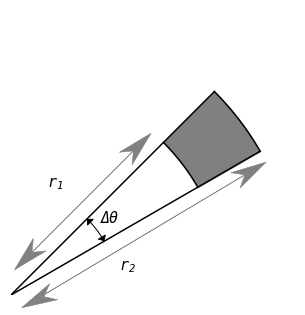

In [20]:
fig12b = plt.figure(figsize=(4,4))
ax12b = fig12b.add_axes([0,0,1,1])
ax12b.set_xlim(0, 0.8)
ax12b.set_ylim(0, 0.8)
ax12b.set_yticks([])
ax12b.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax12b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax12b.spines[direction].set_position('zero')

ax12b.plot([0, 0.8*np.cos(30/180*np.pi)], [0, 0.8*np.sin(30/180*np.pi)], color='black')
ax12b.plot([0, 0.8*np.cos(45/180*np.pi)], [0, 0.8*np.sin(45/180*np.pi)], color='black')

t = np.linspace(30/180*np.pi, 45/180*np.pi, 100)
for r in np.arange(0.6, 1, 0.2):
    ax12b.plot(r*np.cos(t), r*np.sin(t), color='black')

alpha = 30/180*np.pi
beta = 45/180*np.pi
x_l = 0.6*np.cos(beta)
x_r = 0.8*np.cos(alpha)
y_l = 0.6*np.sin(beta)
y_r = 0.8*np.sin(alpha)
a = (y_r-y_l)/(x_r-x_l)
c = y_l-a*x_l

ax12b.fill_between([x_l, 0.8*np.cos(beta)], [y_l, 0.8*np.sin(beta)], [y_l, a*0.8*np.cos(beta)+c], color="grey")
ax12b.fill_between([0.6*np.cos(alpha), x_r], [0.6*np.sin(alpha), y_r], [a*0.6*np.cos(alpha)+c, y_r], color="grey")

t = np.linspace(alpha, beta, 100)
x_list = 0.8*np.cos(t)
f1_list = 0.8*np.sin(t)
f2_list = x_list*a+c
ax12b.fill_between(x_list, f1_list, f2_list, color="grey")

t = np.linspace(alpha, beta, 100)
x_list = 0.6*np.cos(t)
f1_list = 0.6*np.sin(t)
f2_list = x_list*a+c
ax12b.fill_between(x_list, f1_list, f2_list, color="grey")

ax12b.arrow(0.02, 0.08, 0.37, 0.37, fc='grey', ec='grey', lw = .5, head_width=0.05, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax12b.arrow(0.02, 0.08, -0.01, -0.01, fc='grey', ec='grey', lw = .5, head_width=0.05, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax12b.arrow(0.04, -0.03, 0.67, 0.4, fc='grey', ec='grey', lw = .5, head_width=0.05, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax12b.arrow(0.04, -0.03, -0.01, -0.005, fc='grey', ec='grey', lw = .5, head_width=0.05, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

path = matplotlib.path.Path(np.array([np.array([0.3*np.cos(theta), 0.3*np.sin(theta)]) for theta in np.linspace(30/180*np.pi, 45/180*np.pi, 100)]), codes=None, _interpolation_steps=1, closed=False, readonly=False)
arc = patches.FancyArrowPatch(path=path, connectionstyle="arc3,rad=0.6", arrowstyle="<|-|>, head_width=4, head_length=4", color="k")

ax12b.add_patch(arc)

ax12b.text(0.25, 0.2, '\u0394\u03B8', color="black", size=15)
ax12b.text(0.1, 0.3, 'r$_1$', color="black", size=15)
ax12b.text(0.3, 0.07, 'r$_2$', color="black", size=15)
fig12b.savefig("fig_multiple_12b.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_13

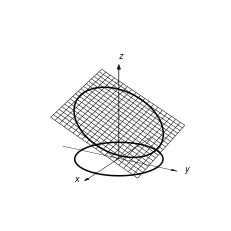

In [21]:
# figure set-up
fig13 = plt.figure(figsize=(4,4))
ax13 = plt.axes(projection='3d')
ax13.axis('off')
ax13.margins(0,0,0)

x, y = np.meshgrid(np.linspace(-1.1, 1.1, 20), np.linspace(-1.1, 1.1, 20))
z = 4-x-2*y

ax13.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)
ax13.plot(x, y, 4-x-2*y, color='black', zorder=15)
ax13.plot(x, y, x*0, color='black', zorder=15)

# Axis
arrow3d(ax13, length=3, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black', offset=(-1.5,0,0))
arrow3d(ax13, length=3, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black', offset=(0,-1.5,0))
arrow3d(ax13, length=10, width=0.005, head=0.05, headwidth=8, color='black')

ax13.text(1.6, -0.2, 0, "x", style='italic', color='black', size=8)
ax13.text(-0.1, 1.6, 0, "y", style='italic', color='black', size=8)
ax13.text(0, 0, 10.6, "z", style='italic', color='black', size=8)

ax13.view_init(20, 30)
fig13.savefig("fig_multiple_13.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_14a

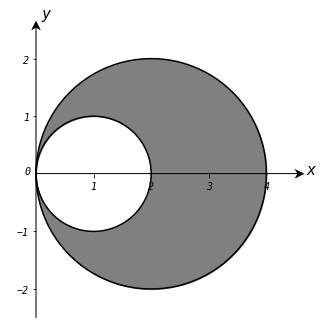

In [22]:
fig14a = plt.figure(figsize=(4,4))
ax14a = fig14a.add_axes([0,0,1,1])
ax14a.set_xlim(-0.5, 4.5)
ax14a.set_ylim(-2.5, 2.5)
ax14a.set_yticks([-2, -1, 1, 2])
ax14a.set_xticks([1, 2, 3, 4])
ax14a.text(-0.2, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax14a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax14a.spines[direction].set_position('zero')
        
t = np.linspace(0, 2*np.pi, 100)
ax14a.plot(np.cos(t)+1, np.sin(t), color='black')
ax14a.plot(2*np.cos(t)+2, 2*np.sin(t), color='black')

t = np.linspace(np.pi/2, np.pi, 100)
x = 2*np.cos(t)+2
y1 = np.sin(np.arccos(x-1))
y2 = 2*np.sin(t)
ax14a.fill_between(x, y1, y2, color="grey")

t = np.linspace(0, np.pi/2, 100)
x = 2*np.cos(t)+2
y2 = 2*np.sin(t)
ax14a.fill_between(x, 0, y2, color="grey")

t = np.linspace(np.pi/2, np.pi, 100)
x = 2*np.cos(t)+2
y1 = -np.sin(np.arccos(x-1))
y2 = -2*np.sin(t)
ax14a.fill_between(x, y1, y2, color="grey")

t = np.linspace(0, np.pi/2, 100)
x = 2*np.cos(t)+2
y2 = -2*np.sin(t)
ax14a.fill_between(x, 0, y2, color="grey")

ax14a.arrow(0, 0, 4.5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax14a.arrow(0, -2.5, 0, 5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax14a.text(4.7, 0, 'x', color="black", size=15)
ax14a.text(0.1, 2.7, 'y', color="black", size=15)
fig14a.savefig("fig_multiple_14a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_14b

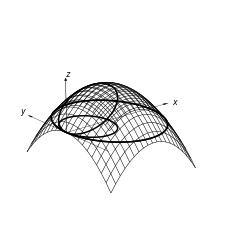

In [23]:
# figure set-up
fig14b = plt.figure(figsize=(4,4))
ax14b = plt.axes(projection='3d')
ax14b.axis('off')
ax14b.margins(0,0,0)

x, y = np.meshgrid(np.linspace(0, 4.1, 20), np.linspace(-2.1, 2.1, 20))
z = 4-(x-2)**2-y**2

ax14b.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)+1
y = np.sin(t)
ax14b.plot(x, y, 4-(x-2)**2-y**2, color='black', zorder=15)
ax14b.plot(x, y, x*0, color='black', zorder=15)

t = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(t)+2
y = 2*np.sin(t)
ax14b.plot(x, y, 4-(x-2)**2-y**2, color='black', zorder=15)
ax14b.plot(x, y, x*0, color='black', zorder=15)

# Axis
arrow3d(ax14b, length=5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black', )
arrow3d(ax14b, length=4, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black', offset=(0,-2,0))
arrow3d(ax14b, length=6, width=0.005, head=0.05, headwidth=8, color='black')

ax14b.text(5, -0.2, 0, "x", style='italic', color='black', size=8)
ax14b.text(-0.1, 2.3, 0, "y", style='italic', color='black', size=8)
ax14b.text(0, 0, 6.2, "z", style='italic', color='black', size=8)

ax14b.view_init(20, -130)
fig14b.savefig("fig_multiple_14b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_15

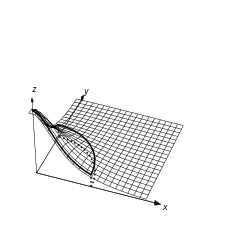

In [24]:
# figure set-up
fig15 = plt.figure(figsize=(4,4))
ax15 = plt.axes(projection='3d')
ax15.axis('off')
ax15.margins(0,0,0)

x, y = np.meshgrid(np.linspace(-0.1, 4, 20), np.linspace(-0.1, 4, 20))
z = 1/(x**2+y**2+1)

ax15.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, np.pi/2, 100)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax15.plot(x, y, 1/(x**2+y**2+1), color='black', zorder=15)
ax15.plot(x, y, x*0, color='black', zorder=15, ls=':')
ax15.plot([2, 2], [0, 0], [0, 1/(2**2+1)], color='black', zorder=15, ls=':')
ax15.plot([0, 0], [2, 2], [0, 1/(2**2+1)], color='black', zorder=15, ls=':')

t = np.linspace(0, 2, 10)
ax15.plot(t, 0*t, 1/(t**2+1), color='black', zorder=15)
ax15.plot(0*t, t, 1/(t**2+1), color='black', zorder=15)



# Axis
arrow3d(ax15, length=4.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax15, length=4.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax15, length=1.2, width=0.005, head=0.05, headwidth=8, color='black')

ax15.text(4.6, -0.2, 0, "x", style='italic', color='black', size=8)
ax15.text(-0.1, 4.6, 0, "y", style='italic', color='black', size=8)
ax15.text(0, 0, 1.3, "z", style='italic', color='black', size=8)

ax15.view_init(40, -70)
fig15.savefig("fig_multiple_15.pdf",bbox_inches='tight',dpi=200)
plt.show()

## Centre of mass

### fig_multiple_16a

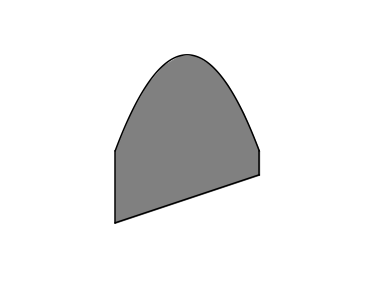

In [25]:
fig16a = plt.figure(figsize=(5,4))
ax16a = fig16a.add_axes([0,0,1,1])
ax16a.set_xlim(-0.5, 4.5)
ax16a.set_ylim(-0.5, 2.5)
ax16a.set_yticks([])
ax16a.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax16a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax16a.spines[direction].set_position('zero')
        
x = np.linspace(1, 3, 100)
ax16a.plot(x, -(x-2)**2+2, color='black')
ax16a.plot(x, 0.25*x, color='black')
ax16a.plot([1, 1], [0.25, 1], color='black')
ax16a.plot([3, 3], [0.75, 1], color='black')

x = np.linspace(1, 3, 10)
ax16a.fill_between(x, -(x-2)**2+2, 0.25*x, color="grey")

fig16a.savefig("fig_multiple_16a.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_16b

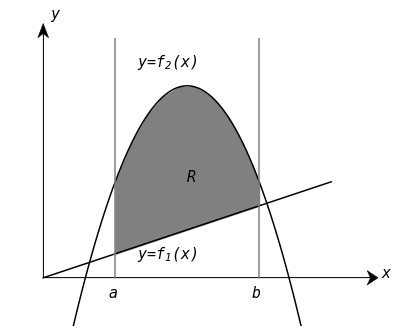

In [26]:
fig16b = plt.figure(figsize=(5,4))
ax16b = fig16b.add_axes([0,0,1,1])
ax16b.set_xlim(-0.5, 4.5)
ax16b.set_ylim(-0.5, 2.5)
ax16b.set_yticks([])
ax16b.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax16b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax16b.spines[direction].set_position('zero')
        
x = np.linspace(0, 4, 100)
ax16b.plot(x, -(x-2)**2+2, color='black')
ax16b.plot(x, 0.25*x, color='black')
ax16b.plot([1, 1], [0, 2.5], color='grey')
ax16b.plot([3, 3], [0, 2.5], color='grey')

x = np.linspace(1, 3, 10)
ax16b.fill_between(x, -(x-2)**2+2, 0.25*x, color="grey")

ax16b.arrow(0, 0, 4.5, 0., fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)
ax16b.arrow(0, 0, 0, 2.5, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.15, overhang = 0.3, length_includes_head= False, clip_on = False)

ax16b.text(1.3, 2.2, 'y=f$_2$(x)', color="black", size=15)
ax16b.text(1.3, 0.2, 'y=f$_1$(x)', color="black", size=15)

ax16b.text(2, 1, 'R', color="black", size=15)
ax16b.text(0.9, -0.2, 'a', color="black", size=15)
ax16b.text(2.9, -0.2, 'b', color="black", size=15)

ax16b.text(4.7, 0, 'x', color="black", size=15)
ax16b.text(0.1, 2.7, 'y', color="black", size=15)
fig16b.savefig("fig_multiple_16b.pdf",bbox_inches='tight')
plt.show()

### fig_multiple_17

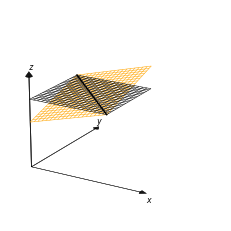

In [27]:
# figure set-up
fig17 = plt.figure(figsize=(4,4))
ax17 = plt.axes(projection='3d')
ax17.axis('off')
ax17.margins(0,0,0)

x, y = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
z = x+y+2
ax17.plot_wireframe(x, y, z, color='orange', lw=0.5)

x, y = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
z = x*0+3
ax17.plot_wireframe(x, y, z, color='black', lw=0.5)

ax17.plot([1,0], [0,1], [3,3], color='black', zorder=17)

# Axis
arrow3d(ax17, length=1.5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax17, length=1.5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax17, length=4.2, width=0.005, head=0.05, headwidth=8, color='black')

ax17.text(1.6, -0.2, 0, "x", style='italic', color='black', size=8)
ax17.text(-0.1, 1.6, 0, "y", style='italic', color='black', size=8)
ax17.text(0, 0, 4.3, "z", style='italic', color='black', size=8)

ax17.view_init(20, -60)
fig17.savefig("fig_multiple_17.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_18a

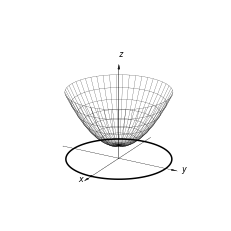

In [28]:
# figure set-up
fig18a = plt.figure(figsize=(4,4))
ax18a = plt.axes(projection='3d')
ax18a.axis('off')
ax18a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 10)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = R**2+1

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax18a.plot_wireframe(x, y, z, color='black', linewidth=0.2)


t = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax18a.plot(x, y, x*0, color='black', zorder=15)

# Axis
arrow3d(ax18a, length=5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black', offset=(-2.5,0,0))
arrow3d(ax18a, length=5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black', offset=(0,-2.5,0))
arrow3d(ax18a, length=7, width=0.005, head=0.05, headwidth=8, color='black')

ax18a.text(2.6, -0.2, 0, "x", style='italic', color='black', size=8)
ax18a.text(-0.1, 2.6, 0, "y", style='italic', color='black', size=8)
ax18a.text(0, 0, 7.6, "z", style='italic', color='black', size=8)

ax18a.view_init(20, 30)
fig18a.savefig("fig_multiple_18a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_18b

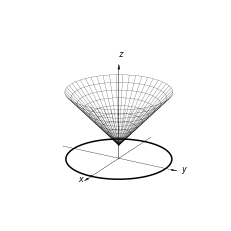

In [29]:
# figure set-up
fig18b = plt.figure(figsize=(4,4))
ax18b = plt.axes(projection='3d')
ax18b.axis('off')
ax18b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 10)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
z = 2*R+1

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax18b.plot_wireframe(x, y, z, color='black', linewidth=0.2)


t = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax18b.plot(x, y, x*0, color='black', zorder=15)

# Axis
arrow3d(ax18b, length=5, width=0.005, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black', offset=(-2.5,0,0))
arrow3d(ax18b, length=5, width=0.005, head=0.05, headwidth=8, theta_x=-90, color='black', offset=(0,-2.5,0))
arrow3d(ax18b, length=7, width=0.005, head=0.05, headwidth=8, color='black')

ax18b.text(2.6, -0.2, 0, "x", style='italic', color='black', size=8)
ax18b.text(-0.1, 2.6, 0, "y", style='italic', color='black', size=8)
ax18b.text(0, 0, 7.6, "z", style='italic', color='black', size=8)

ax18b.view_init(20, 30)
fig18b.savefig("fig_multiple_18b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_19

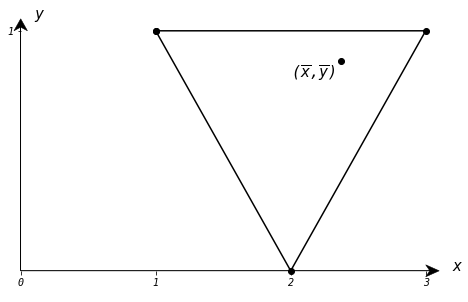

In [30]:
fig19 = plt.figure(figsize=(6,4))
ax19 = fig19.add_axes([0,0,1,1])
ax19.set_xlim(-0.1, 3.1)
ax19.set_ylim(-0.1, 1.1)
ax19.set_yticks([1])
ax19.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax19.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax19.spines[direction].set_position('zero')
        
ax19.plot([1, 3, 2, 1], [1, 1, 0, 1], color='black', marker='o')
ax19.scatter([2.375], [0.875], color='black')

ax19.arrow(0, 0, 3, 0., fc='k', ec='k', lw = .5, head_width=0.05, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax19.arrow(0, 0, 0, 1, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.05, overhang = 0.3, length_includes_head= False, clip_on = False)

ax19.text(2, 0.8, '($\\overline{x}$,$\\overline{y}$)', color="black", size=15)

ax19.text(3.2, 0, 'x', color="black", size=15)
ax19.text(0.1, 1.05, 'y', color="black", size=15)
fig19.savefig("fig_multiple_19.pdf",bbox_inches='tight')
plt.show()

## Surface area

### fig_multiple_20a

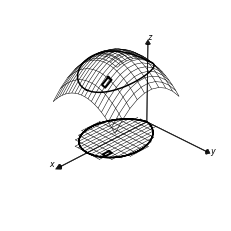

In [31]:
# figure set-up
fig20a = plt.figure(figsize=(4,4))
ax20a = plt.axes(projection='3d')
ax20a.axis('off')
ax20a.margins(0,0,0)

x, y = np.meshgrid(np.linspace(0, 2.1, 10), np.linspace(-1, 1, 20))
z = -.5*(x-1)**2-.5*(y)**2+2

ax20a.plot_wireframe(x, y, z, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 1000)
ax20a.plot3D(np.abs(np.cos(t)*(1+np.cos(2*t))), np.sin(t)*(1+np.cos(2*t)), t*0, color='black')
x = np.cos(t)*(1+np.cos(2*t))
y = np.sin(t)*(1+np.cos(2*t))
z = -0.5*((np.cos(t)*(1+np.cos(2*t)))-1)**2 - 0.5*(np.sin(t)*(1+np.cos(2*t)))**2+2
x_list = []
y_list = []
z_list = []
for i, value in enumerate(x):
    if value >= 0:
        x_list.append(x[i])
        y_list.append(y[i])
        z_list.append(z[i])
ax20a.plot3D(x_list, y_list, z_list, color='black')

ax20a.plot3D([.2, .2], [-.4, .4], [0,0], color='black', lw=0.5)
ax20a.plot3D([.4, .4], [-.6, .6], [0,0], color='black', lw=0.5)
ax20a.plot3D([.6, .6], [-.7, .7], [0,0], color='black', lw=0.5)
ax20a.plot3D([.8, .8], [-.8, .8], [0,0], color='black', lw=0.5)
ax20a.plot3D([1, 1], [-.8, .8], [0,0], color='black', lw=0.5)
ax20a.plot3D([1.2, 1.2], [-.8, .8], [0,0], color='black', lw=0.5)
ax20a.plot3D([1.4, 1.4], [-.8, .8], [0,0], color='black', lw=0.5)
ax20a.plot3D([1.6, 1.6], [-.7, .7], [0,0], color='black', lw=0.5)
ax20a.plot3D([1.8, 1.8], [-.6, .6], [0,0], color='black', lw=0.5)
ax20a.plot3D([2, 2], [-.4, .4], [0,0], color='black', lw=0.5)

ax20a.plot3D([.8, 1.4], [.8, .8], [0,0], color='black', lw=0.5)
ax20a.plot3D([.6, 1.6], [.7, .7], [0,0], color='black', lw=0.5)
ax20a.plot3D([.4, 1.8], [.6, .6], [0,0], color='black', lw=0.5)
ax20a.plot3D([.4, 1.8], [.5, .5], [0,0], color='black', lw=0.5)
ax20a.plot3D([.2, 2], [.4, .4], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [.3, .3], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [.2, .2], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [.1, .1], [0,0], color='black', lw=0.5)
ax20a.plot3D([.8, 1.4], [-.8, -.8], [0,0], color='black', lw=0.5)
ax20a.plot3D([.6, 1.6], [-.7, -.7], [0,0], color='black', lw=0.5)
ax20a.plot3D([.4, 1.8], [-.6, -.6], [0,0], color='black', lw=0.5)
ax20a.plot3D([.4, 1.8], [-.5, -.5], [0,0], color='black', lw=0.5)
ax20a.plot3D([.2, 2], [-.4, -.4], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [-.3, -.3], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [-.2, -.2], [0,0], color='black', lw=0.5)
ax20a.plot3D([0, 2], [-.1, -.1], [0,0], color='black', lw=0.5)

ax20a.plot3D([1.6, 1.6, 1.8, 1.8, 1.6], [0.3, .4, .4, 0.3, 0.3], [1.76, 1.73, 1.62, 1.65, 1.76], color='black', lw=2)
ax20a.plot3D([1.6, 1.6, 1.8, 1.8, 1.6], [0.3, .4, .4, 0.3, 0.3], [0, 0, 0, 0, 0], color='black', lw=2)

# Axis
arrow3d(ax20a, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax20a, length=2, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax20a, length=2, width=0.01, head=0.05, headwidth=6, color='black')

ax20a.text(3, -0.2, 0, "x", style='italic', color='black', size=8)
ax20a.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax20a.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax20a.view_init(30, 45)
fig20a.savefig("fig_multiple_20a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_20b

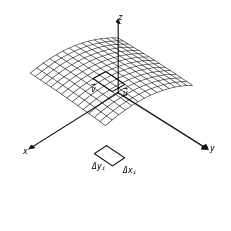

In [32]:
# figure set-up
fig20b = plt.figure(figsize=(4,4))
ax20b = plt.axes(projection='3d')
ax20b.axis('off')
ax20b.margins(0,0,0)


x, y = np.meshgrid(np.linspace(0, 1.4, 15), np.linspace(0, .4, 15))
z = -.5*(x-1)**2-.5*(y)**2+2
ax20b.plot_wireframe(x, y, z, color='black', lw=0.5)

x, y = np.meshgrid(np.linspace(.8, 1, 2), np.linspace(.2, .3, 2))
z = 1.96375+.1*(x-.9)-.25*(y-.25)
ax20b.plot_wireframe(x, y, z, color='black', lw=1)

ax20b.plot3D([.8, .8, 1, 1, .8], [.2, .3, .3, .2, .2], [0, 0, 0, 0, 0], color='black', lw=1)

ax20b.text(1, 0.35, 0, "\u0394x$_i$", style='italic', color='black', size=8)
ax20b.text(1.2, 0.25, 0, "\u0394y$_i$", style='italic', color='black', size=8)
ax20b.text(1, 0.35, 2, "$\\overrightarrow{u}$", style='italic', color='black', size=8)
ax20b.text(1.2, 0.25, 2, "$\\overrightarrow{v}$", style='italic', color='black', size=8)

# Axis
arrow3d(ax20b, length=1.5, width=0.002, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax20b, length=0.5, width=0.008, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax20b, length=2, width=0.002, head=0.05, headwidth=6, color='black')

ax20b.text(1.6, 0, 0, "x", style='italic', color='black', size=8)
ax20b.text(0, 0.5, 0, "y", style='italic', color='black', size=8)
ax20b.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax20b.view_init(40, 45)
fig20b.savefig("fig_multiple_20b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_21

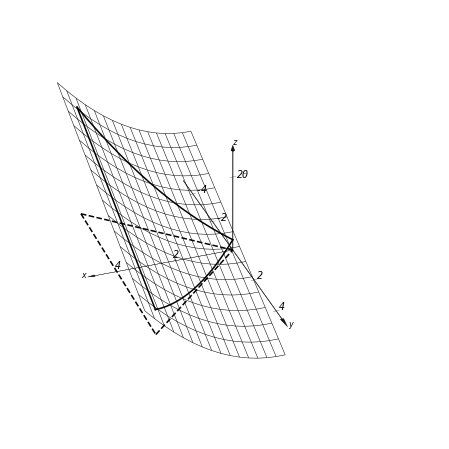

In [33]:
# figure set-up
fig21 = plt.figure(figsize=(8, 8))
ax21 = plt.axes(projection='3d')
ax21.axis('off')
ax21.set_xlim3d(-4.25, 4.5)
ax21.set_ylim3d(-4.25, 4.5)
ax21.set_zlim3d(-15.25, 35)
ax21.view_init(30, 70)
ax21.margins(0,0,0)

# ticks
ax21.text(-0.1, -4, 0.1, "-4", color='black')
ax21.text(-0.1, -2, 0.1, "-2", color='black')
ax21.text(-0.1, 2, 0.1, "2", color='black')
ax21.text(-0.1, 4, 0.1, "4", color='black')
ax21.plot3D([-0.1, 0.1], [-4, -4], [0, 0], 'black', linewidth=0.25)
ax21.plot3D([-0.1, 0.1], [-2, -2], [0, 0], 'black', linewidth=0.25)
ax21.plot3D([-0.1, 0.1], [2, 2], [0, 0], 'black', linewidth=0.25)
ax21.plot3D([-0.1, 0.1], [4, 4], [0, 0], 'black', linewidth=0.25)

ax21.text(2, -0.2, 0.1, "2", color='black')
ax21.text(4, -0.2, 0.1, "4", color='black')
ax21.plot3D([2, 2], [-0.1, 0.1], [0, 0], 'black', linewidth=0.25)
ax21.plot3D([4, 4], [-0.1, 0.1], [0, 0], 'black', linewidth=0.25)

ax21.text(-0.1, 0.1, 21, "20", color='black')
ax21.plot3D([-0.1, 0.1], [0, 0], [21, 21], 'black', linewidth=0.25)


# Area 
def f(x, y):
    return x**2 - 3*y + 3
x = np.linspace(-0.125, 4.5, 16)
y = np.linspace(-4.5, 4.5, 16)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax21.plot_wireframe(X, Y, Z, color="black", linewidth=0.5)

# Projection
ax21.plot3D([4, 4], [-4, 4], [0, 0], 'black', linestyle="dashed")
ax21.plot3D([4, 0], [4, 0], [0, 0], 'black', linestyle="dashed")
ax21.plot3D([4, 0], [-4, 0], [0, 0], 'black', linestyle="dashed")

# Curves
x = []
for _ in range(16):
    x.append(4)
x = np.array(x)
y = np.linspace(-4, 4, 16)
ax21.plot3D(x, y, f(x, y), 'black')

x = np.linspace(0, 4, 16)
y = np.linspace(0, 4, 16)
ax21.plot3D(x, y, f(x, y), 'black')

x = np.linspace(4, 0, 16)
y = np.linspace(-4, 0, 16)
ax21.plot3D(x, y, f(x, y), 'black')

# Axis
arrow3d(ax21, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax21, length=10, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -5, 0))
arrow3d(ax21, length=30, width=0.01, head=0.05, headwidth=6, color='black')

ax21.text(5.2, 0, 0, "x", style='italic', color='black', size=8)
ax21.text(0, 5, 0, "y", style='italic', color='black', size=8)
ax21.text(0, 0, 30, "z", style='italic', color='black', size=8)

fig21.savefig("fig_multiple_21.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_22a

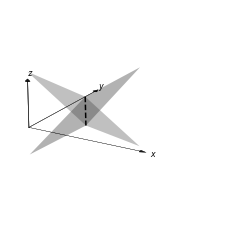

In [34]:
# figure set-up
fig22a = plt.figure(figsize=(4,4))
ax22a = plt.axes(projection='3d')
ax22a.axis('off')
ax22a.margins(0,0,0)

x, y = np.meshgrid(np.linspace(0, 2, 2), np.linspace(0, 4, 2))
z = 3*x+y-4
ax22a.plot_surface(x, y, z, color='black', lw=0.5, alpha=0.3)

x, y = np.meshgrid(np.linspace(0, 2, 2), np.linspace(0, 4, 2))
z = 8-3*x-2*y
ax22a.plot_surface(x, y, z, color='grey', lw=0.5, alpha=0.3)

ax22a.plot([0,2], [4,0], [0,2], color='black', zorder=20, ls='--')

# Axis
arrow3d(ax22a, length=4, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax22a, length=5, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax22a, length=7, width=0.01, head=0.05, headwidth=8, color='black')

ax22a.text(4.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax22a.text(-0.1, 5.2, 0, "y", style='italic', color='black', size=8)
ax22a.text(0, 0, 7.5, "z", style='italic', color='black', size=8)

ax22a.view_init(20, -60)
fig22a.savefig("fig_multiple_22a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_22b

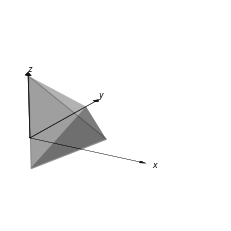

In [35]:
# figure set-up
fig22b = plt.figure(figsize=(4,4))
ax22b = plt.axes(projection='3d')
ax22b.axis('off')
ax22b.margins(0,0,0)

x = np.linspace(0, 2, 10)
z1 = 3*x-4
z2 = 8-3*x
ax22b.plot_trisurf([0, 2, 0, 0], [4, 0, 0, 4], [0, 2, -4, 0], color='black', lw=0.5, alpha=0.3, antialiased=True)
ax22b.plot_trisurf([0, 2, 0, 0], [4, 0, 0, 4], [0, 2, 8, 0], color='black', lw=0.5, alpha=0.3, antialiased=True)


ax22b.add_collection3d(plt.fill_between(x,z1,z2, color='grey', alpha=0.5), zs=0, zdir='y')

# Axis
arrow3d(ax22b, length=3, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax22b, length=5, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax22b, length=8.5, width=0.01, head=0.05, headwidth=8, color='black')

ax22b.text(3.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax22b.text(-0.1, 5.2, 0, "y", style='italic', color='black', size=8)
ax22b.text(0, 0, 8.6, "z", style='italic', color='black', size=8)

ax22b.view_init(20, -60)
fig22b.savefig("fig_multiple_22b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_23a

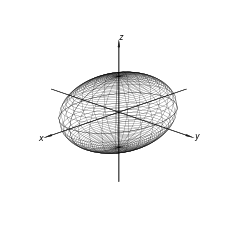

In [36]:
# figure set-up
fig23a = plt.figure(figsize=(4,4))
ax23a = plt.axes(projection='3d')
ax23a.set_xlim3d(-2, 2)
ax23a.set_ylim3d(-2, 2)
ax23a.set_zlim3d(-2, 2)
ax23a.axis('off')
ax23a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 30)
p = np.linspace(0, 2*np.pi, 30)
R, P = np.meshgrid(r, p)
z = np.sqrt(1-R**2)*1.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*2, R*np.sin(P)*1.5

# Plot the surface.
ax23a.plot_wireframe(x, y, z, color='black', linewidth=0.2)
ax23a.plot_wireframe(x, y, -z, color='black', linewidth=0.2)


# Axis
arrow3d(ax23a, length=6, width=0.01, head=0.05, headwidth=3, theta_x=90, theta_z=90, offset=(-3,0,0), color='black')
arrow3d(ax23a, length=6, width=0.01, head=0.05, headwidth=3, theta_x=-90, offset=(0,-3,0), color='black')
arrow3d(ax23a, length=6, width=0.01, head=0.05, headwidth=3, offset=(0,0,-3), color='black')

ax23a.text(3.2, 0, 0, "x", color='black', size=8)
ax23a.text(0, 3, 0, "y", color='black', size=8)
ax23a.text(0, 0, 3, "z", color='black', size=8)

ax23a.view_init(20, 45)
fig23a.savefig("fig_multiple_23a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_23b

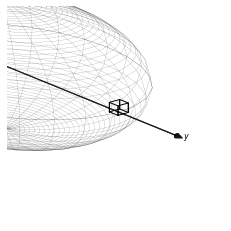

In [37]:
# figure set-up
fig23b = plt.figure(figsize=(4,4))
ax23b = plt.axes(projection='3d')
ax23b.set_xlim3d(-1, 1)
ax23b.set_ylim3d(1, 2)
ax23b.set_zlim3d(-1, 1)
ax23b.axis('off')
ax23b.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 30)
p = np.linspace(0, 2*np.pi, 30)
R, P = np.meshgrid(r, p)
z = np.sqrt(1-R**2)*1.5

# Express the mesh in the cartesian system.
x, y = R*np.cos(P)*2, R*np.sin(P)*1.5

# Plot the surface.
ax23b.plot_wireframe(x, y, z, color='black', linewidth=0.1)
ax23b.plot_wireframe(x, y, -z, color='black', linewidth=0.1)

ax23b.plot([0.1, 0.1, 0.1, 0.1, 0.1],[1.45, 1.45, 1.55, 1.55, 1.45],[0, 0.2, 0.2, 0, 0], color='black', lw=1)
ax23b.plot([0.1, 0.1, -0.1, -0.1, 0.1],[1.45, 1.45, 1.45, 1.45, 1.45],[0, 0.2, 0.2, 0, 0], color='black', lw=1)
ax23b.plot([0.1, 0.1, -0.1, -0.1, 0.1],[1.55, 1.55, 1.55, 1.55, 1.55],[0, 0.2, 0.2, 0, 0], color='black', lw=1)
ax23b.plot([-0.1, -0.1, -0.1, -0.1, -0.1],[1.45, 1.45, 1.55, 1.55, 1.45],[0, 0.2, 0.2, 0, 0], color='black', lw=1)

# Axis
arrow3d(ax23b, length=2.2, width=0.01, head=0.03, headwidth=5, theta_x=-90, color='black')

ax23b.text(0, 2.2, 0, "y", color='black', size=8)

ax23b.view_init(20, 50)
fig23b.savefig("fig_multiple_23b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_24a

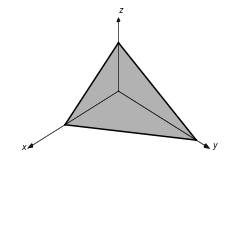

In [38]:
# figure set-up
fig24a = plt.figure(figsize=(4,4))
ax24a = plt.axes(projection='3d')
ax24a.axis('off')
ax24a.margins(0,0,0)
z=2-y/3-2*x/3
ax24a.plot_trisurf([0, 3, 0, 0], [0, 0, 6, 0], [2, 0, 0, 2], color='black', lw=0.5, alpha=0.3, antialiased=True)
ax24a.plot([3,0], [0,6], [0,0], color='black')
ax24a.plot([3,0], [0,0], [0,2], color='black')
ax24a.plot([0,0], [6,0], [0,2], color='black')

# Axis
arrow3d(ax24a, length=5, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax24a, length=7, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax24a, length=3, width=0.01, head=0.05, headwidth=8, color='black')

ax24a.text(5.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax24a.text(-0.1, 7, 0, "y", style='italic', color='black', size=8)
ax24a.text(0, 0, 3.2, "z", style='italic', color='black', size=8)

ax24a.view_init(40, 45)
fig24a.savefig("fig_multiple_24a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_24b

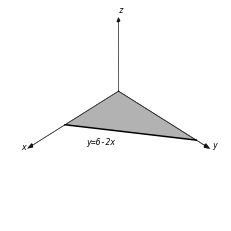

In [39]:
# figure set-up
fig24b = plt.figure(figsize=(4,4))
ax24b = plt.axes(projection='3d')
ax24b.axis('off')
ax24b.margins(0,0,0)
ax24b.plot_trisurf([0, 3, 0, 0], [0, 0, 6, 0], [0, 0, 0, 0], color='black', lw=0.5, alpha=0.3, antialiased=True)
ax24b.plot([3,0], [0,6], [0,0], color='black')

# Axis
arrow3d(ax24b, length=5, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax24b, length=7, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax24b, length=3, width=0.01, head=0.05, headwidth=8, color='black')

ax24b.text(3.2, 2, 0, "y=6-2x", style='italic', color='black', size=8)
ax24b.text(5.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax24b.text(-0.1, 7, 0, "y", style='italic', color='black', size=8)
ax24b.text(0, 0, 3.2, "z", style='italic', color='black', size=8)

ax24b.view_init(40, 45)
fig24b.savefig("fig_multiple_24b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_24c

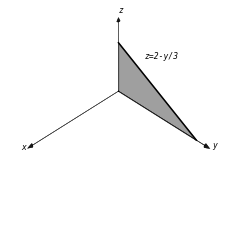

In [40]:
# figure set-up
fig24c = plt.figure(figsize=(4,4))
ax24c = plt.axes(projection='3d')
ax24c.axis('off')
ax24c.margins(0,0,0)

z=2-y/3-2*x/3
ax24c.add_collection3d(plt.fill_between([0,6],[2,0],0, color='grey', alpha=0.5), zs=0, zdir='x')
ax24c.plot([0,0], [6,0], [0,2], color='black', zorder=10)

# Axis
arrow3d(ax24c, length=5, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax24c, length=7, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax24c, length=3, width=0.01, head=0.05, headwidth=8, color='black')

ax24c.text(0, 2, 2, "z=2-y/3", style='italic', color='black', size=8)
ax24c.text(5.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax24c.text(-0.1, 7, 0, "y", style='italic', color='black', size=8)
ax24c.text(0, 0, 3.2, "z", style='italic', color='black', size=8)

ax24c.view_init(40, 45)
fig24c.savefig("fig_multiple_24c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_24d

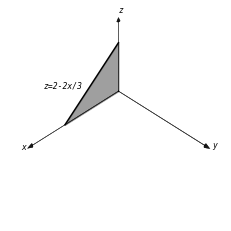

In [41]:
# figure set-up
fig24d = plt.figure(figsize=(4,4))
ax24d = plt.axes(projection='3d')
ax24d.axis('off')
ax24d.margins(0,0,0)

ax24d.add_collection3d(plt.fill_between([0,3],[2,0],0, color='grey', alpha=0.5), zs=0, zdir='y')
ax24d.plot([3,0], [0,0], [0,2], color='black', zorder=10)

# Axis
arrow3d(ax24d, length=5, width=0.01, head=0.05, headwidth=8, theta_x=90, theta_z=90, color='black')
arrow3d(ax24d, length=7, width=0.01, head=0.05, headwidth=8, theta_x=-90, color='black')
arrow3d(ax24d, length=3, width=0.01, head=0.05, headwidth=8, color='black')

ax24d.text(4, 0, 2, "z=2-2x/3", style='italic', color='black', size=8)
ax24d.text(5.2, -0.2, 0, "x", style='italic', color='black', size=8)
ax24d.text(-0.1, 7, 0, "y", style='italic', color='black', size=8)
ax24d.text(0, 0, 3.2, "z", style='italic', color='black', size=8)

ax24d.view_init(40, 45)
fig24d.savefig("fig_multiple_24d.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_25a

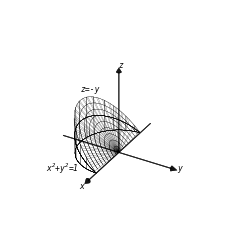

In [42]:
# figure set-up
fig25a = plt.figure(figsize=(4,4))
ax25a = plt.axes(projection='3d')
ax25a.axis('off')
ax25a.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 10)
p = np.linspace(0, 2*np.pi+1, 50)
R, P = np.meshgrid(r, p)

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax25a.plot_wireframe(x, -np.abs(y), np.abs(y), color='black', linewidth=0.2)

ax25a.plot_wireframe(np.cos(P), -np.abs(np.sin(P)), 0.5*np.abs(np.sin(P)), color='black', linewidth=0.1)
ax25a.plot_wireframe(np.cos(P), -np.abs(np.sin(P)), 0*np.abs(np.sin(P)), color='black', linewidth=0.1)

for t in np.arange(0, 2*np.pi, 0.5):
    x = np.cos(t)
    y = np.sin(t)
    ax25a.plot([x, x], [-np.abs(y), -np.abs(y)], [0, np.abs(y)], color='black', linewidth=0.5)

# Axis
arrow3d(ax25a, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-1.5, 0, 0))
arrow3d(ax25a, length=3, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -1.5, 0))
arrow3d(ax25a, length=2, width=0.01, head=0.05, headwidth=6, color='black')

ax25a.text(1.5, -1, 0, "x$^2$+y$^2$=1", style='italic', color='black', size=8)
ax25a.text(0, -1, 1.2, "z=-y", style='italic', color='black', size=8)

ax25a.text(1.7, 0, 0, "x", style='italic', color='black', size=8)
ax25a.text(0, 1.5, 0, "y", style='italic', color='black', size=8)
ax25a.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax25a.view_init(30, 30)
fig25a.savefig("fig_multiple_25a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_25b

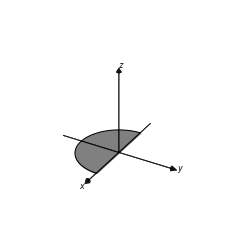

In [43]:
# figure set-up
fig25b = plt.figure(figsize=(4,4))
ax25b = plt.axes(projection='3d')
ax25b.axis('off')
ax25b.margins(0,0,0)

t = np.linspace(0, -np.pi, 50)
ax25b.plot(np.cos(t), -np.abs(np.sin(t)), 0*t, color='black', linewidth=1, zorder=10)
ax25b.add_collection3d(plt.fill_between(np.cos(t), np.sin(t),0*t, color='grey'), zs=0, zdir='z')

# Axis
arrow3d(ax25b, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-1.5, 0, 0))
arrow3d(ax25b, length=3, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -1.5, 0))
arrow3d(ax25b, length=2, width=0.01, head=0.05, headwidth=6, color='black')

ax25b.text(1.7, 0, 0, "x", style='italic', color='black', size=8)
ax25b.text(0, 1.5, 0, "y", style='italic', color='black', size=8)
ax25b.text(0, 0, 2, "z", style='italic', color='black', size=8)

ax25b.view_init(30, 30)
fig25b.savefig("fig_multiple_25b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_26a

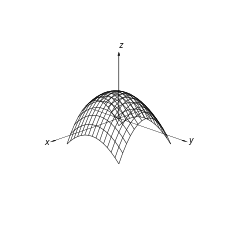

In [44]:
# figure set-up
fig26a = plt.figure(figsize=(4,4))
ax26a = plt.axes(projection='3d')
ax26a.axis('off')
ax26a.margins(0,0,0)

x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
z = 6-2*x**2-y**2
ax26a.plot_wireframe(x, y, z, color='black', lw=0.5)

# Axis
arrow3d(ax26a, length=7, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax26a, length=7, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax26a, length=15, width=0.01, head=0.05, headwidth=6, color='black')

ax26a.text(5.4, 0, 0, "x", style='italic', color='black', size=8)
ax26a.text(0, 5, 0, "y", style='italic', color='black', size=8)
ax26a.text(0, 0, 16, "z", style='italic', color='black', size=8)

ax26a.view_init(20, 45)
fig26a.savefig("fig_multiple_26a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_26b

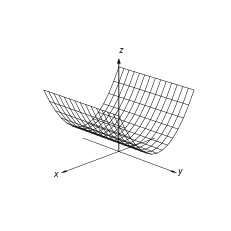

In [45]:
# figure set-up
fig26b = plt.figure(figsize=(4,4))
ax26b = plt.axes(projection='3d')
ax26b.axis('off')
ax26b.margins(0,0,0)

x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
z = 2*x**2+2
ax26b.plot_wireframe(x, y, z, color='black', lw=0.5)

# Axis
arrow3d(ax26b, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax26b, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax26b, length=15, width=0.01, head=0.05, headwidth=6, color='black')

ax26b.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax26b.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax26b.text(0, 0, 16, "z", style='italic', color='black', size=8)

ax26b.view_init(20, 45)
fig26b.savefig("fig_multiple_26b.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_26c

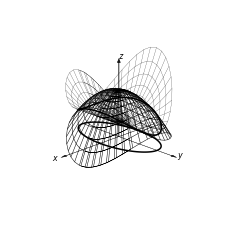

In [46]:
# figure set-up
fig26c = plt.figure(figsize=(4,4))
ax26c = plt.axes(projection='3d')
ax26c.axis('off')
ax26c.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 10)
p = np.linspace(0, 2*np.pi+1, 50)
R, P = np.meshgrid(r, p)

# Express the mesh in the cartesian system.
x, y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax26c.plot_wireframe(x, y, 2*x**2+2, color='black', linewidth=0.2)
ax26c.plot_wireframe(x, y, 6-2*x**2-y**2, color='black', lw=0.5)

t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = 2*np.sin(t)
ax26c.plot(x, y, 0*t, color='black')
ax26c.plot(x, y, 2*x**2+2, color='black')

# Axis
arrow3d(ax26c, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax26c, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax26c, length=10, width=0.01, head=0.05, headwidth=6, color='black')

ax26c.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax26c.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax26c.text(0, 0, 10, "z", style='italic', color='black', size=8)

ax26c.view_init(20, 45)
fig26c.savefig("fig_multiple_26c.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_26d

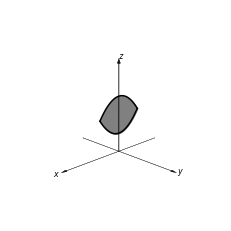

In [47]:
# figure set-up
fig26d = plt.figure(figsize=(4,4))
ax26d = plt.axes(projection='3d')
ax26d.axis('off')
ax26d.margins(0,0,0)

x = np.linspace(-1, 1, 100)
ax26d.plot(x, 0*x, 2*x**2+2, color='black', zorder=10)
ax26d.plot(x, 0*x, 6-2*x**2, color='black', zorder=10)
ax26d.add_collection3d(plt.fill_between(x, 2*x**2+2, 6-2*x**2, color='grey'), zs=0, zdir='y')

# Axis
arrow3d(ax26d, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax26d, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax26d, length=10, width=0.01, head=0.05, headwidth=6, color='black')

ax26d.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax26d.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax26d.text(0, 0, 10, "z", style='italic', color='black', size=8)

ax26d.view_init(20, 45)
fig26d.savefig("fig_multiple_26d.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_26e

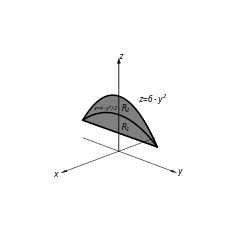

In [48]:
# figure set-up
fig26e = plt.figure(figsize=(4,4))
ax26e = plt.axes(projection='3d')
ax26e.axis('off')
ax26e.margins(0,0,0)

y = np.linspace(-2, 2, 100)
ax26e.plot(y*0, y, y*0+2, color='black', zorder=10)
ax26e.plot(y*0, y, 6-y**2, color='black', zorder=10)
ax26e.plot(y*0, y, 4-y**2/2, color='black', zorder=10)
ax26e.add_collection3d(plt.fill_between(y, y*0+2, 6-y**2, color='grey'), zs=0, zdir='x')

# Axis
arrow3d(ax26e, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax26e, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax26e, length=10, width=0.01, head=0.05, headwidth=6, color='black')

ax26e.text(0, 1, 6, "z=6-y$^2$", style='italic', color='black', size=8)
ax26e.text(0, -1.4, 3.5, "z=4-y$^2$/2", style='italic', color='black', size=5, zorder=10)

ax26e.text(0, 0.1, 2.5, "R$_1$", style='italic', color='black', size=8, zorder=10)
ax26e.text(0, 0.1, 4.5, "R$_2$", style='italic', color='black', size=8, zorder=10)

ax26e.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax26e.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax26e.text(0, 0, 10, "z", style='italic', color='black', size=8)

ax26e.view_init(20, 45)
fig26e.savefig("fig_multiple_26e.pdf",bbox_inches='tight',dpi=200)
plt.show()

## Triple integration with cylindrical and spherical coordinates

### fig_multiple_27

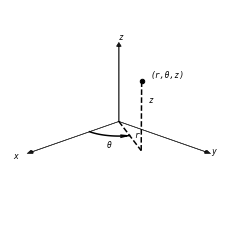

In [49]:
# figure set-up
fig27 = plt.figure(figsize=(4,4))
ax27 = plt.axes(projection='3d')
ax27.axis('off')
ax27.margins(0,0,0)

t = np.linspace(0, 60*np.pi/180)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax27.plot(np.cos(t), np.sin(t), 0*t, color='black')

ax27.plot([0, x[-1]], [0, y[-1]], [0, 0], color='black', zorder=10, ls='--')
ax27.plot([x[-1],x[-1]], [y[-1],y[-1]], [0, 2.5], color='black', zorder=10, ls='--')
ax27.scatter([x[-1]], [y[-1]], [2.5], color='black')

ax27.text(1.4, 2.4, 3, "(r,\u03B8,z)", style='italic', color='black', size=8)

ax27.text(1.4, 1, 0, "\u03B8", style='italic', color='black', size=8)
ax27.text(0.5, 1, 0, "r", style='italic', color='black', size=8)
ax27.text(0, 1, 1.1, "z", style='italic', color='black', size=8)
ax27.quiver(0.5*x[-5], 0.5*y[-5], 0, 0.5*x[-4]-0.5*x[-5], 0.5*y[-4]-0.5*y[-5], 0, arrow_length_ratio=8, color='black')

# Axis
arrow3d(ax27, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax27, length=3, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax27, length=3, width=0.01, head=0.05, headwidth=6, color='black')

ax27.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax27.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax27.text(0, 0, 3.1, "z", style='italic', color='black', size=8)

ax27.view_init(20, 45)
fig27.savefig("fig_multiple_27.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_28

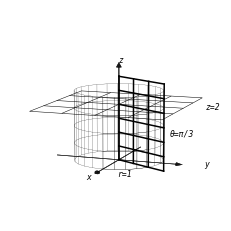

In [50]:
# figure set-up
fig28 = plt.figure(figsize=(4,4))
ax28 = plt.axes(projection='3d')
ax28.axis('off')
ax28.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2.5, 5)
p = np.linspace(0, 2*np.pi+1, 30)
R, P = np.meshgrid(r, p)
z=R

# Express the mesh in the cartesian system.
x, y = np.cos(P), np.sin(P)

# Plot the surface.
ax28.plot_wireframe(x, y, z, color='black', linewidth=0.2)

x, y = np.meshgrid(np.linspace(-1.5, 1.5, 5), np.linspace(-1.5, 1.5, 5))
z = x*0+2
ax28.plot_wireframe(x, y, z, color='black', lw=0.5)

for z in np.arange(0, 3.5, 0.5):
    plt.plot([0, 1.5*np.cos(np.pi/3)], [0, 1.5*np.sin(np.pi/3)], [z, z], color='black')
    
for r in np.arange(0, 2, 0.5):
    plt.plot([r*np.cos(np.pi/3), r*np.cos(np.pi/3)], [r*np.sin(np.pi/3), r*np.sin(np.pi/3)], [0, 3], color='black')

# Axis
arrow3d(ax28, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-1.5, 0, 0))
arrow3d(ax28, length=3, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -1.5, 0))
arrow3d(ax28, length=3.5, width=0.01, head=0.05, headwidth=6, color='black')

ax28.text(1.5, 0.5, 0, "r=1", style='italic', color='black', size=8)
ax28.text(0, 1.2, 1, "\u03B8=\u03C0/3", style='italic', color='black', size=8)
ax28.text(0, 2, 2, "z=2", style='italic', color='black', size=8)

ax28.text(2, 0, 0, "x", style='italic', color='black', size=8)
ax28.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax28.text(0, 0, 3.5, "z", style='italic', color='black', size=8)

ax28.view_init(10, 20)
fig28.savefig("fig_multiple_28.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_29

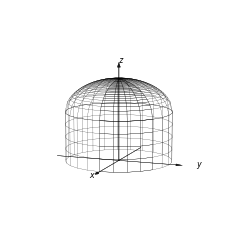

In [51]:
# figure set-up
fig29 = plt.figure(figsize=(4,4))
ax29 = plt.axes(projection='3d')
ax29.axis('off')
ax29.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 25)
p = np.linspace(0, 2*np.pi+1, 30)
R, P = np.meshgrid(r, p)
x, y = 1.99999*R*np.cos(P), 1.99999*R*np.sin(P)
z = np.sqrt(4-x**2-y**2)+3

# Plot the surface.
ax29.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 3, 5)
p = np.linspace(0, 2*np.pi+1, 30)
R, P = np.meshgrid(r, p)
x, y = 2*np.cos(P), 2*np.sin(P)
z = R

# Plot the surface.
ax29.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax29, length=5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2.5, 0, 0))
arrow3d(ax29, length=5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2.5, 0))
arrow3d(ax29, length=6, width=0.01, head=0.05, headwidth=6, color='black')

ax29.text(3, 0, 0, "x", style='italic', color='black', size=8)
ax29.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax29.text(0, 0, 6, "z", style='italic', color='black', size=8)

ax29.view_init(10, 20)
fig29.savefig("fig_multiple_29.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_30

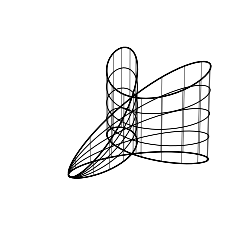

In [52]:
# figure set-up
fig30 = plt.figure(figsize=(4,4))
ax30 = plt.axes(projection='3d')
ax30.axis('off')
ax30.margins(0,0,0)

t = np.linspace(0, 2*np.pi, 100)
x = np.cos(3*t)*np.cos(t)
y = np.cos(3*t)*np.sin(t)
z = 0*t
ax30.plot(x, y, (1-x+0.1*y), color='black', lw=1)
ax30.plot(x, y, 0*(1-x+0.1*y), color='black', lw=1)
for factor in np.linspace(0, 1, 5):
    ax30.plot(x, y, factor*(1-x+0.1*y), color='black', lw=0.5)

for t in np.linspace(0, 2*np.pi, 30):
    x_val = np.cos(3*t)*np.cos(t)
    y_val = np.cos(3*t)*np.sin(t)
    ax30.plot([x_val, x_val], [y_val, y_val], [0, 1-x_val+0.1*y_val], color='black', lw=0.5)

ax30.view_init(20, 45)
fig30.savefig("fig_multiple_30.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_31

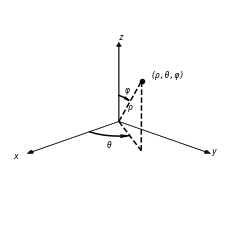

In [53]:
# figure set-up
fig31 = plt.figure(figsize=(4,4))
ax31 = plt.axes(projection='3d')
ax31.axis('off')
ax31.margins(0,0,0)

t = np.linspace(0, 20*np.pi/180)
z = 2*np.cos(t)
y = 2*np.sin(t)
ax31.plot(0*t, np.sin(t), np.cos(t), color='black')
ax31.quiver(0, 0.5*y[-5], 0.5*z[-5], 0, 0.5*y[-4]-0.5*y[-5], 0.5*z[-4]-0.5*z[-5], arrow_length_ratio=20, color='black')

t = np.linspace(0, 60*np.pi/180)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax31.plot(np.cos(t), np.sin(t), 0*t, color='black')

ax31.plot([0, x[-1]], [0, y[-1]], [0, 0], color='black', zorder=10, ls='--')
ax31.plot([x[-1],x[-1]], [y[-1],y[-1]], [0, 2.5], color='black', zorder=10, ls='--')
ax31.plot([0,x[-1]], [0,y[-1]], [0, 2.5], color='black', zorder=10, ls='--')
ax31.scatter([x[-1]], [y[-1]], [2.5], color='black')

ax31.text(1.4, 2.4, 3, "(\u03C1,\u03B8,\u03C6)", style='italic', color='black', size=8)

ax31.text(1.4, 1, 0, "\u03B8", style='italic', color='black', size=8)
ax31.text(0, 0.3, 0.6, "\u03C1", style='italic', color='black', size=8)
ax31.text(0, 0.2, 1.2, "\u03C6", style='italic', color='black', size=8)
ax31.quiver(0.5*x[-5], 0.5*y[-5], 0, 0.5*x[-4]-0.5*x[-5], 0.5*y[-4]-0.5*y[-5], 0, arrow_length_ratio=8, color='black')

# Axis
arrow3d(ax31, length=3, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax31, length=3, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax31, length=3, width=0.01, head=0.05, headwidth=6, color='black')

ax31.text(3.4, 0, 0, "x", style='italic', color='black', size=8)
ax31.text(0, 3, 0, "y", style='italic', color='black', size=8)
ax31.text(0, 0, 3.1, "z", style='italic', color='black', size=8)

ax31.view_init(20, 45)
fig31.savefig("fig_multiple_31.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_32

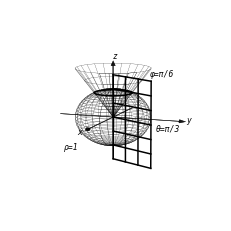

In [54]:
# figure set-up
fig32 = plt.figure(figsize=(4,4))
ax32 = plt.axes(projection='3d')
ax32.axis('off')
ax32.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
t = np.linspace(0, 2*np.pi, 30)
p = np.linspace(0, np.pi, 30)
t, p = np.meshgrid(t, p)
x = np.cos(t)*np.sin(p)
y = np.sin(t)*np.sin(p)
z = np.cos(p)

# Plot the surface.
ax32.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 5)
p = np.linspace(0, 2*np.pi+1, 30)
R, P = np.meshgrid(r, p)
z=R*0.866025404

# Express the mesh in the cartesian system.
x, y = 0.5*R*np.cos(P), 0.5*R*np.sin(P)

# Plot the surface.
ax32.plot_wireframe(x, y, z, color='black', linewidth=0.2)

t = np.linspace(0, 2*np.pi, 100)
ax32.plot(0.5*np.cos(t), 0.5*np.sin(t), 0*t+0.866025404, color='black')

for z in np.arange(-1.5, 2, 0.5):
    plt.plot([0, 1.5*np.cos(np.pi/3)], [0, 1.5*np.sin(np.pi/3)], [z, z], color='black')
    
for r in np.arange(0, 2, 0.5):
    plt.plot([r*np.cos(np.pi/3), r*np.cos(np.pi/3)], [r*np.sin(np.pi/3), r*np.sin(np.pi/3)], [-1.5, 1.5], color='black')

# Axis
arrow3d(ax32, length=3.5, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-1.5, 0, 0))
arrow3d(ax32, length=3.5, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -1.5, 0))
arrow3d(ax32, length=3.5, width=0.01, head=0.05, headwidth=6, color='black', offset=(0,0,-1.5))

ax32.text(1, 1.5, -0.1, "\u03B8=\u03C0/3", style='italic', color='black', size=8)
ax32.text(1, -1, -1, "\u03C1=1", style='italic', color='black', size=8)
ax32.text(0, 1, 1.5, "\u03C6=\u03C0/6", style='italic', color='black', size=8)

ax32.text(2.5, 0, 0, "x", style='italic', color='black', size=8)
ax32.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax32.text(0, 0, 2.1, "z", style='italic', color='black', size=8)

ax32.view_init(10, 20)
fig32.savefig("fig_multiple_32.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_33

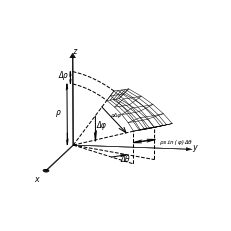

In [60]:
# figure set-up
fig33 = plt.figure(figsize=(4,4))
ax33 = plt.axes(projection='3d')
ax33.axis('off')
ax33.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
t = np.linspace(np.pi/3, np.pi/4, 5)
p = np.linspace(np.pi/3, np.pi/6, 5)
t, p = np.meshgrid(t, p)
x = np.cos(t)*np.sin(p)
y = np.sin(t)*np.sin(p)
z = np.cos(p)

# Plot the surface.
ax33.plot_wireframe(x, y, z, color='black', linewidth=0.5)
ax33.plot_wireframe(1.2*x, 1.2*y, 1.2*z, color='black', linewidth=0.5)

t = np.linspace(np.pi/3, np.pi/4, 10)
for p in np.linspace(np.pi/3, np.pi/6, 2):
    ax33.plot(1.1*np.cos(t)*np.sin(p), 1.1*np.sin(t)*np.sin(p), 1.1*np.cos(p), color='black', lw=0.5)

p = np.linspace(np.pi/3, np.pi/6, 10)
for t in np.linspace(np.pi/3, np.pi/4, 2):
    ax33.plot(1.1*np.cos(t)*np.sin(p), 1.1*np.sin(t)*np.sin(p), 1.1*np.cos(p), color='black', lw=0.5)

for p in np.linspace(np.pi/3, np.pi/6, 5):
    ax33.plot([np.cos(np.pi/3)*np.sin(p), 1.2*np.cos(np.pi/3)*np.sin(p)], [np.sin(np.pi/3)*np.sin(p), 1.2*np.sin(np.pi/3)*np.sin(p)], [np.cos(p), 1.2*np.cos(p)], color='black', lw=0.5)
    ax33.plot([np.cos(np.pi/4)*np.sin(p), 1.2*np.cos(np.pi/4)*np.sin(p)], [np.sin(np.pi/4)*np.sin(p), 1.2*np.sin(np.pi/4)*np.sin(p)], [np.cos(p), 1.2*np.cos(p)], color='black', lw=0.5)

for t in np.linspace(np.pi/3, np.pi/4, 5):
    ax33.plot([np.cos(t)*np.sin(np.pi/3), 1.2*np.cos(t)*np.sin(np.pi/3)], [np.sin(t)*np.sin(np.pi/3), 1.2*np.sin(t)*np.sin(np.pi/3)], [np.cos(np.pi/3), 1.2*np.cos(np.pi/3)], color='black', lw=0.5)
    ax33.plot([np.cos(t)*np.sin(p), 1.2*np.cos(t)*np.sin(p)], [np.sin(t)*np.sin(p), 1.2*np.sin(t)*np.sin(p)], [np.cos(p), 1.2*np.cos(p)], color='black', lw=0.5)

t = np.pi/4
p = np.linspace(0, np.pi/6, 10)
ax33.plot(np.cos(t)*np.sin(p), np.sin(t)*np.sin(p), np.cos(p), ls='--', color='black', lw=1)
ax33.plot(1.2*np.cos(t)*np.sin(p), 1.2*np.sin(t)*np.sin(p), 1.2*np.cos(p), ls='--', color='black', lw=1)

ax33.plot([0, np.cos(np.pi/4)*np.sin(np.pi/6)], [0, np.sin(np.pi/4)*np.sin(np.pi/6)], [0, np.cos(np.pi/6)], ls='--', color='black', lw=1)
ax33.plot([0, np.cos(np.pi/4)*np.sin(np.pi/3)], [0, np.sin(np.pi/4)*np.sin(np.pi/3)], [0, np.cos(np.pi/3)], ls='--', color='black', lw=1)

ax33.plot([0, np.cos(np.pi/4)*np.sin(np.pi/3)], [0, np.sin(np.pi/4)*np.sin(np.pi/3)], [0, 0], ls='--', color='black', lw=1)
ax33.plot([0, np.cos(np.pi/3)*np.sin(np.pi/3)], [0, np.sin(np.pi/3)*np.sin(np.pi/3)], [0, 0], ls='--', color='black', lw=1)

ax33.plot([np.cos(np.pi/4)*np.sin(np.pi/3), np.cos(np.pi/4)*np.sin(np.pi/3)], [np.sin(np.pi/4)*np.sin(np.pi/3), np.sin(np.pi/4)*np.sin(np.pi/3)], [0, np.cos(np.pi/3)], ls='--', color='black', lw=1)
ax33.plot([np.cos(np.pi/3)*np.sin(np.pi/3), np.cos(np.pi/3)*np.sin(np.pi/3)], [np.sin(np.pi/3)*np.sin(np.pi/3), np.sin(np.pi/3)*np.sin(np.pi/3)], [0, np.cos(np.pi/3)], ls='--', color='black', lw=1)

ax33.quiver(0, -0.05, 0, 0, 0, 1, arrow_length_ratio=0.1, color='black', lw=1)
ax33.quiver(0, -0.05, 0.2, 0, 0, -0.2, arrow_length_ratio=0.5, color='black', lw=1)

ax33.quiver(0, -0.02, 1, 0, 0, 0.2, arrow_length_ratio=0.4, color='black', lw=1)
ax33.quiver(0, -0.02, 1.2, 0, 0, -0.2, arrow_length_ratio=0.4, color='black', lw=1)

ax33.quiver(0.4, 0.75, 0.3, 0.15, -0.15, 0, arrow_length_ratio=0.4, color='black', lw=1)
ax33.quiver(0.55, 0.6, 0.3, -0.15, 0.15, 0, arrow_length_ratio=0.4, color='black', lw=1)

ax33.quiver(0.4, 0.4, 0, -0.1, 0.1, 0, arrow_length_ratio=0.4, color='black', lw=1)

ax33.quiver(0.3, 0.25, 0.6, 0, 0, -0.4, arrow_length_ratio=0.4, color='black', lw=1)

ax33.quiver(0.3, 0.3, 0.75, 0, 0.2, -0.4, arrow_length_ratio=0.2, color='black', lw=1)

ax33.text(0, -0.15, 0.5, "\u03C1", style='italic', color='black', size=8)
ax33.text(0, -0.12, 1.1, "\u0394\u03C1", style='italic', color='black', size=8)


ax33.text(0.55, 0.5, 0, "\u0394\u03B8", style='italic', color='black', size=8)
ax33.text(0.55, 0.8, 0.3, "\u03C1$sin$(\u03C6)\u0394\u03B8", style='italic', color='black', size=6)

ax33.text(0, 0.2, 0.3, "\u0394\u03C6", style='italic', color='black', size=8)
ax33.text(0, 0.32, 0.5, "\u03C1\u0394\u03C6", style='italic', color='black', size=6)

# Axis
arrow3d(ax33, length=1, width=0.005, head=0.05, headwidth=5, theta_x=90, theta_z=90, color='black')
arrow3d(ax33, length=1, width=0.005, head=0.05, headwidth=5, theta_x=-90, color='black')
arrow3d(ax33, length=1.5, width=0.005, head=0.05, headwidth=5, color='black')

ax33.text(1.3, 0, 0, "x", style='italic', color='black', size=8)
ax33.text(0, 1, 0, "y", style='italic', color='black', size=8)
ax33.text(0, 0, 1.5, "z", style='italic', color='black', size=8)

ax33.view_init(10, 10)
fig33.savefig("fig_multiple_33.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_multiple_34

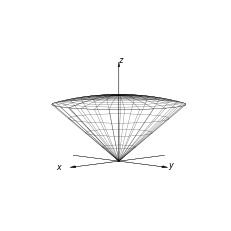

In [65]:
# figure set-up
fig34 = plt.figure(figsize=(4,4))
ax34 = plt.axes(projection='3d')
ax34.axis('off')
ax34.margins(0,0,0)

# Create the mesh in polar coordinates and compute corresponding Z.
t = np.linspace(0, 2*np.pi, 30)
p = np.linspace(0, np.pi/6, 10)
t, p = np.meshgrid(t, p)
x = 4*np.cos(t)*np.sin(p)
y = 4*np.sin(t)*np.sin(p)
z = 4*np.cos(p)

# Plot the surface.
ax34.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2, 5)
p = np.linspace(0, 2*np.pi, 30)
R, P = np.meshgrid(r, p)
R*=2
z=R*0.866025404

# Express the mesh in the cartesian system.
x, y = 0.5*R*np.cos(P), 0.5*R*np.sin(P)

# Plot the surface.
ax34.plot_wireframe(x, y, z, color='black', linewidth=0.2)

# Axis
arrow3d(ax34, length=4, width=0.01, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black', offset=(-2, 0, 0))
arrow3d(ax34, length=4, width=0.01, head=0.05, headwidth=6, theta_x=-90, color='black', offset=(0, -2, 0))
arrow3d(ax34, length=6, width=0.005, head=0.05, headwidth=6, color='black')

ax34.text(2.5, 0, 0, "x", style='italic', color='black', size=8)
ax34.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax34.text(0, 0, 6, "z", style='italic', color='black', size=8)

ax34.view_init(5, 45)
fig34.savefig("fig_multiple_34.pdf",bbox_inches='tight',dpi=200)
plt.show()